### Homework 5

Instructions:

For each of the problems below, Add the following things:
- Code to solve the problem
- Proof of acceptance/attempt (screenshot/link)
- Time Complexity
- Space Complexity
- Thought Process / Reflection on Challenges Faced
- Time Taken for that problem (leetcode provides builtin timer functionality)

**Problem 1:** Clone Graph (20)

In [ ]:

# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []

class Solution:
    
    def __init__(self):
        self.visited = {}
    
    def cloneGraph(self, node: 'Node') -> 'Node':
        
        if not node:
            return None
        
        if node in self.visited:
            return self.visited[node]
        
        clone = Node(node.val)
        self.visited[node] = clone
        
        if node.neighbors:
            clone.neighbors = [self.cloneGraph(neighbor) for neighbor in node.neighbors]
        
        return clone
        

Proof of Acceptance / Attempt:

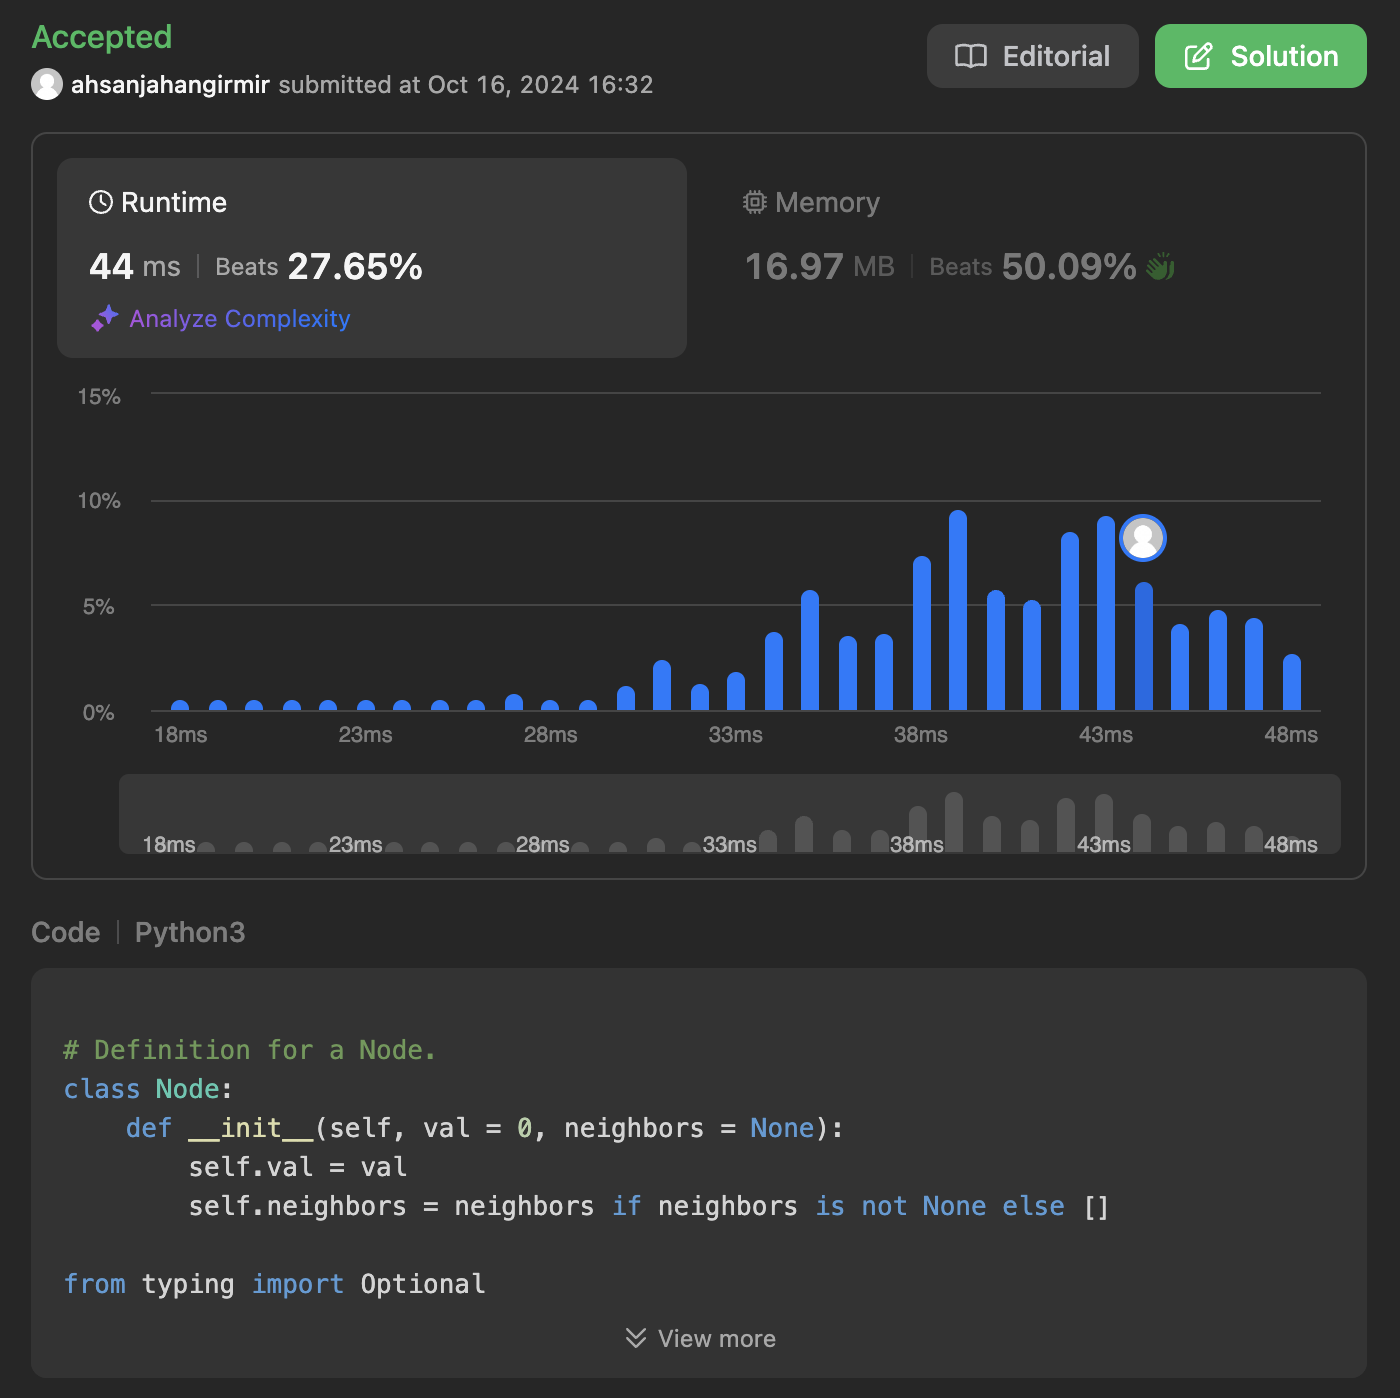
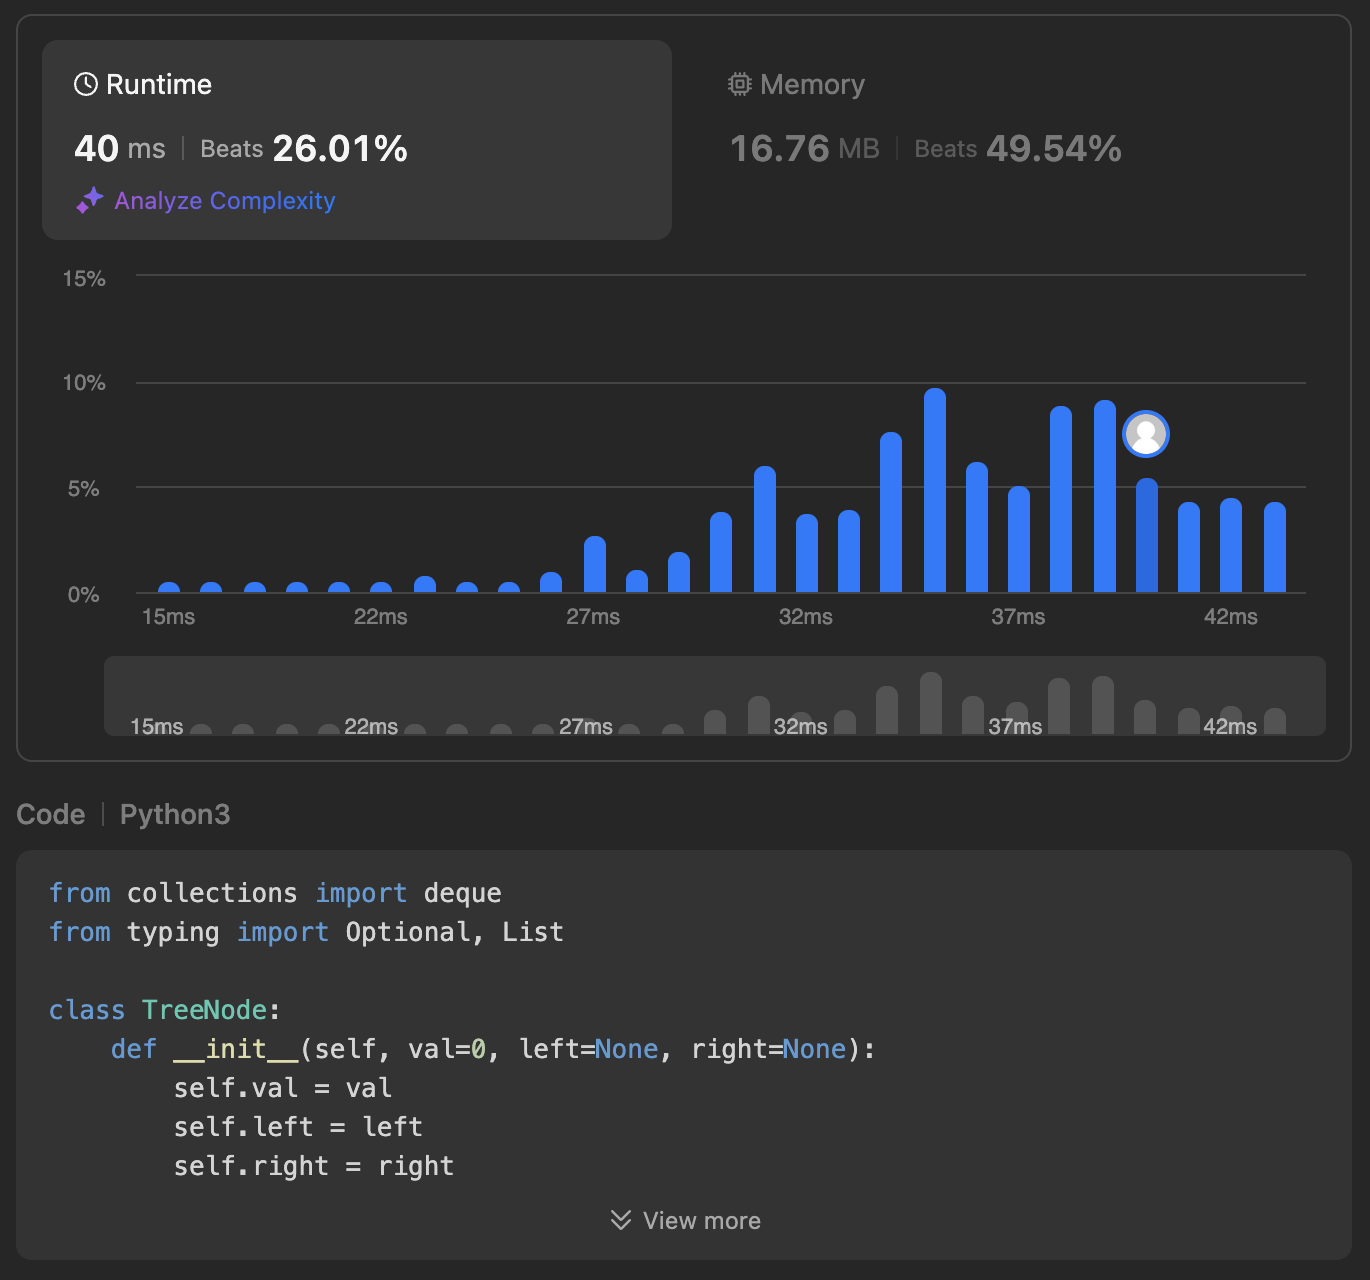
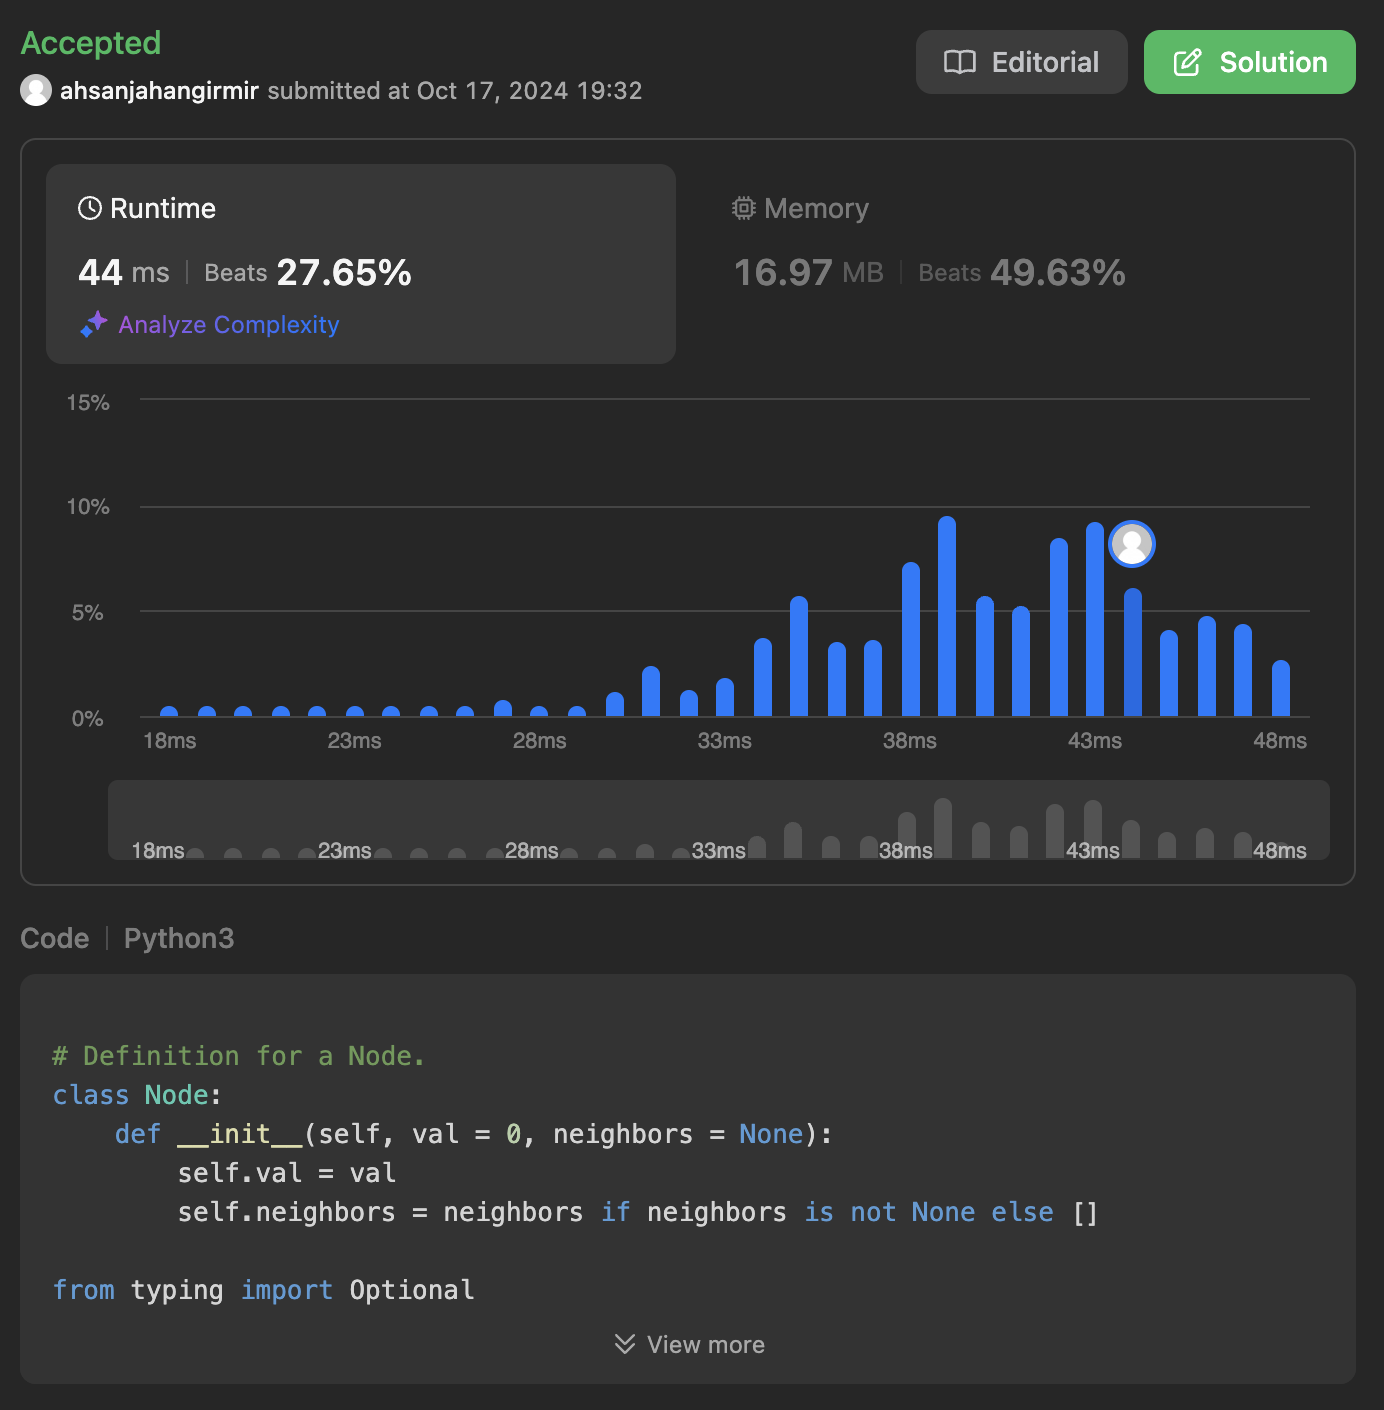
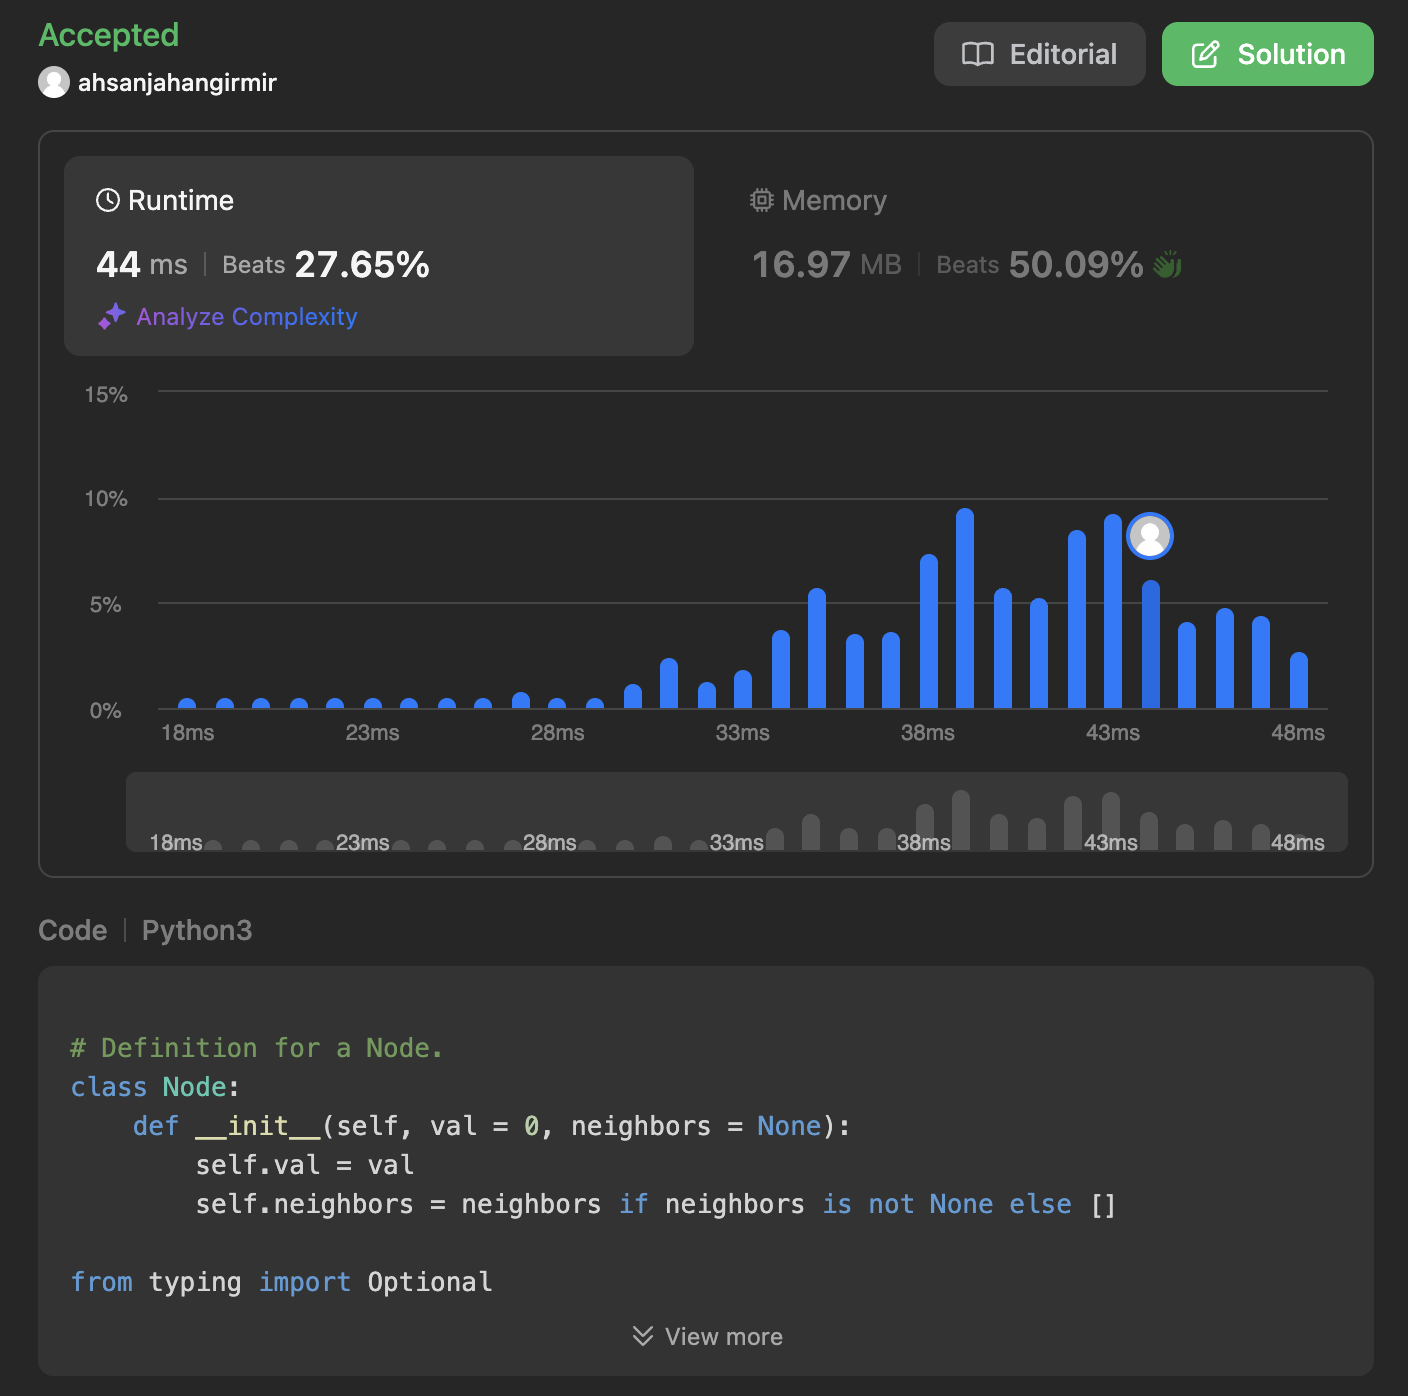
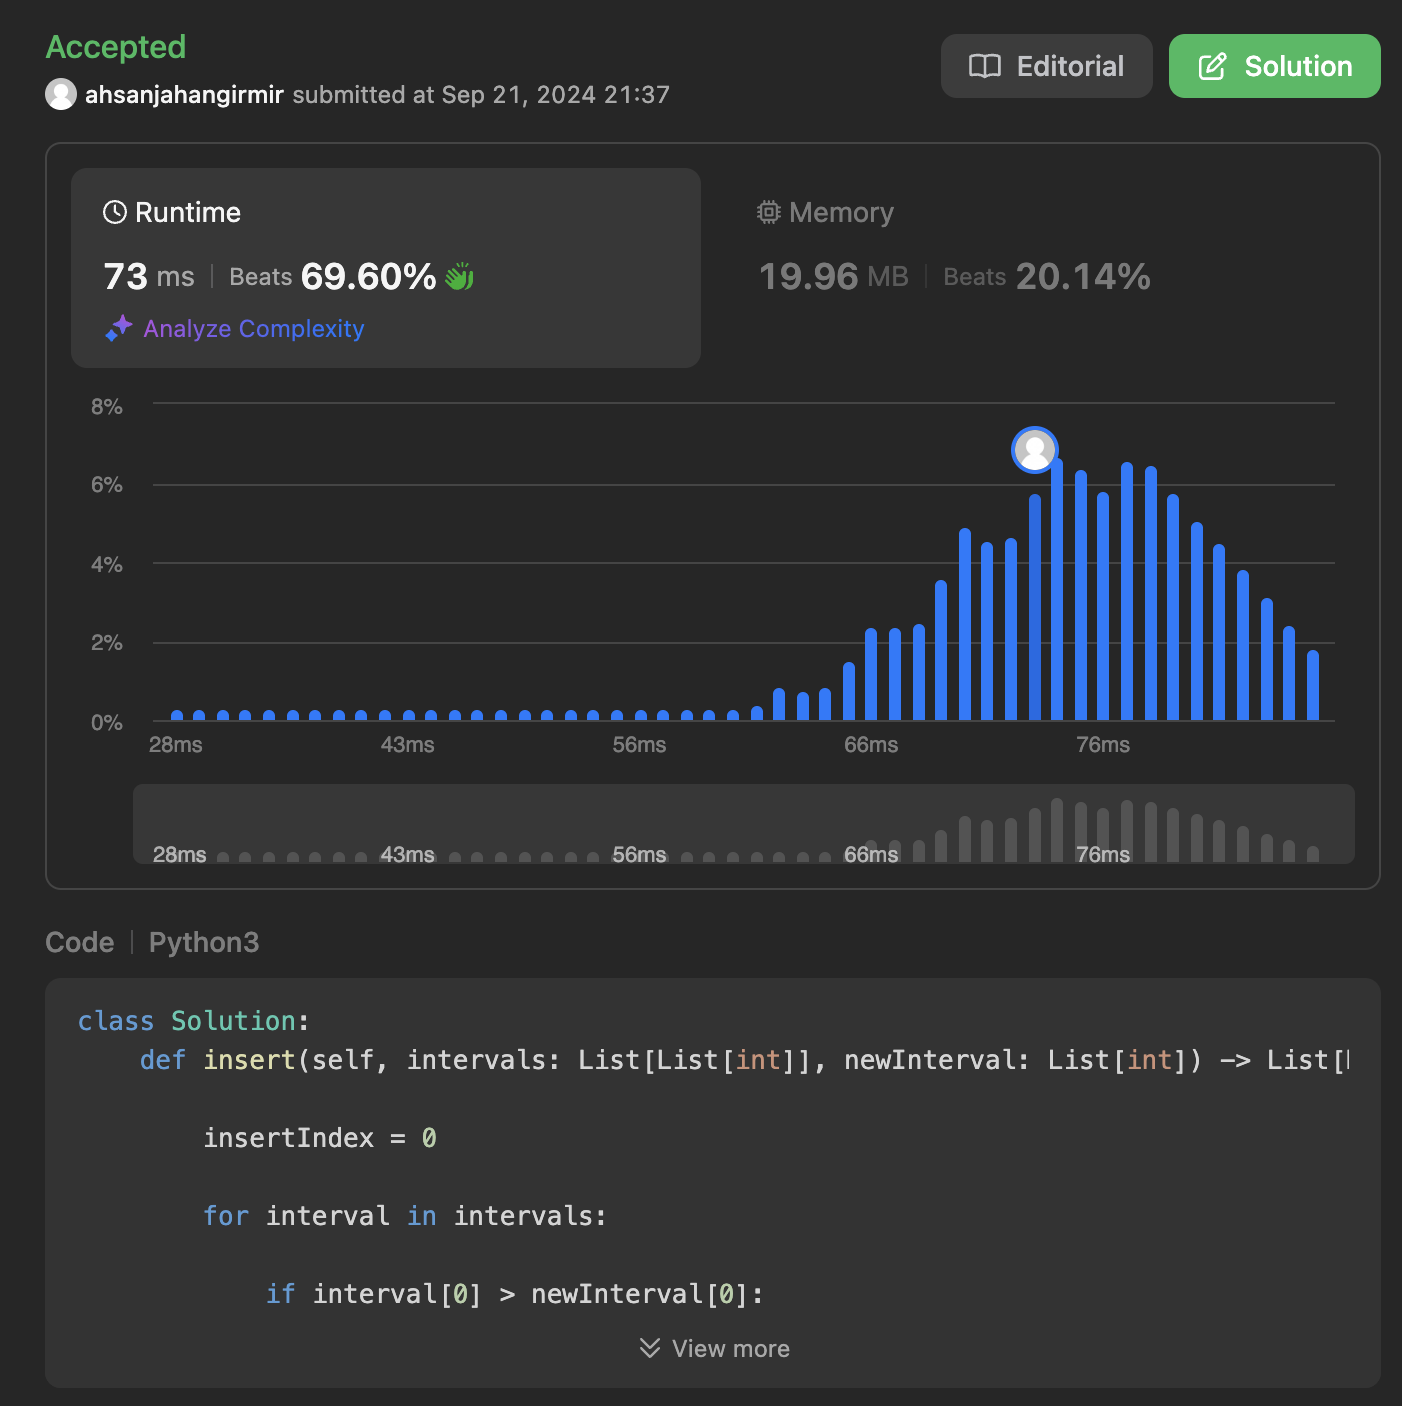

Thought Process / Reflection on challenges faced:

I initially thought about using a breadth-first search (BFS) for copying the nodes but I switched to a DFS because it's easier to manage the recursion stack and maintain the mapping of original nodes to their clones.One challenge I encountered was keeping track of already visited nodes to avoid infinite loops in the case of cyclic graphs. To handle this, I used a dictionary (self.visited) to store and retrieve the cloned nodes, ensuring that each node is only cloned once. It took a bit of time to ensure that the neighbors were correctly cloned, but once I got that right, the rest of the solution fell into place.

Time Complexity

O(V+E)

Space Complexity

O(V)

Time Taken

32 minutes

**Problem 2:**
Course Schedule II (20)

In [ ]:
from collections import deque, defaultdict

class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:

        graph = defaultdict(list)
        in_degree = [0] * numCourses
        
        for course, prereq in prerequisites:
        
            graph[prereq].append(course)
            in_degree[course] += 1
        
        queue = deque([i for i in range(numCourses) if in_degree[i] == 0])
        topo_order = []
        
        while queue:
        
            current = queue.popleft()
            topo_order.append(current)
            
            for neighbor in graph[current]:
                in_degree[neighbor] -= 1
                if in_degree[neighbor] == 0:
                    queue.append(neighbor)
        
        if len(topo_order) == numCourses:
            return topo_order
        else:
            return []


Proof of Acceptance / Attempt:

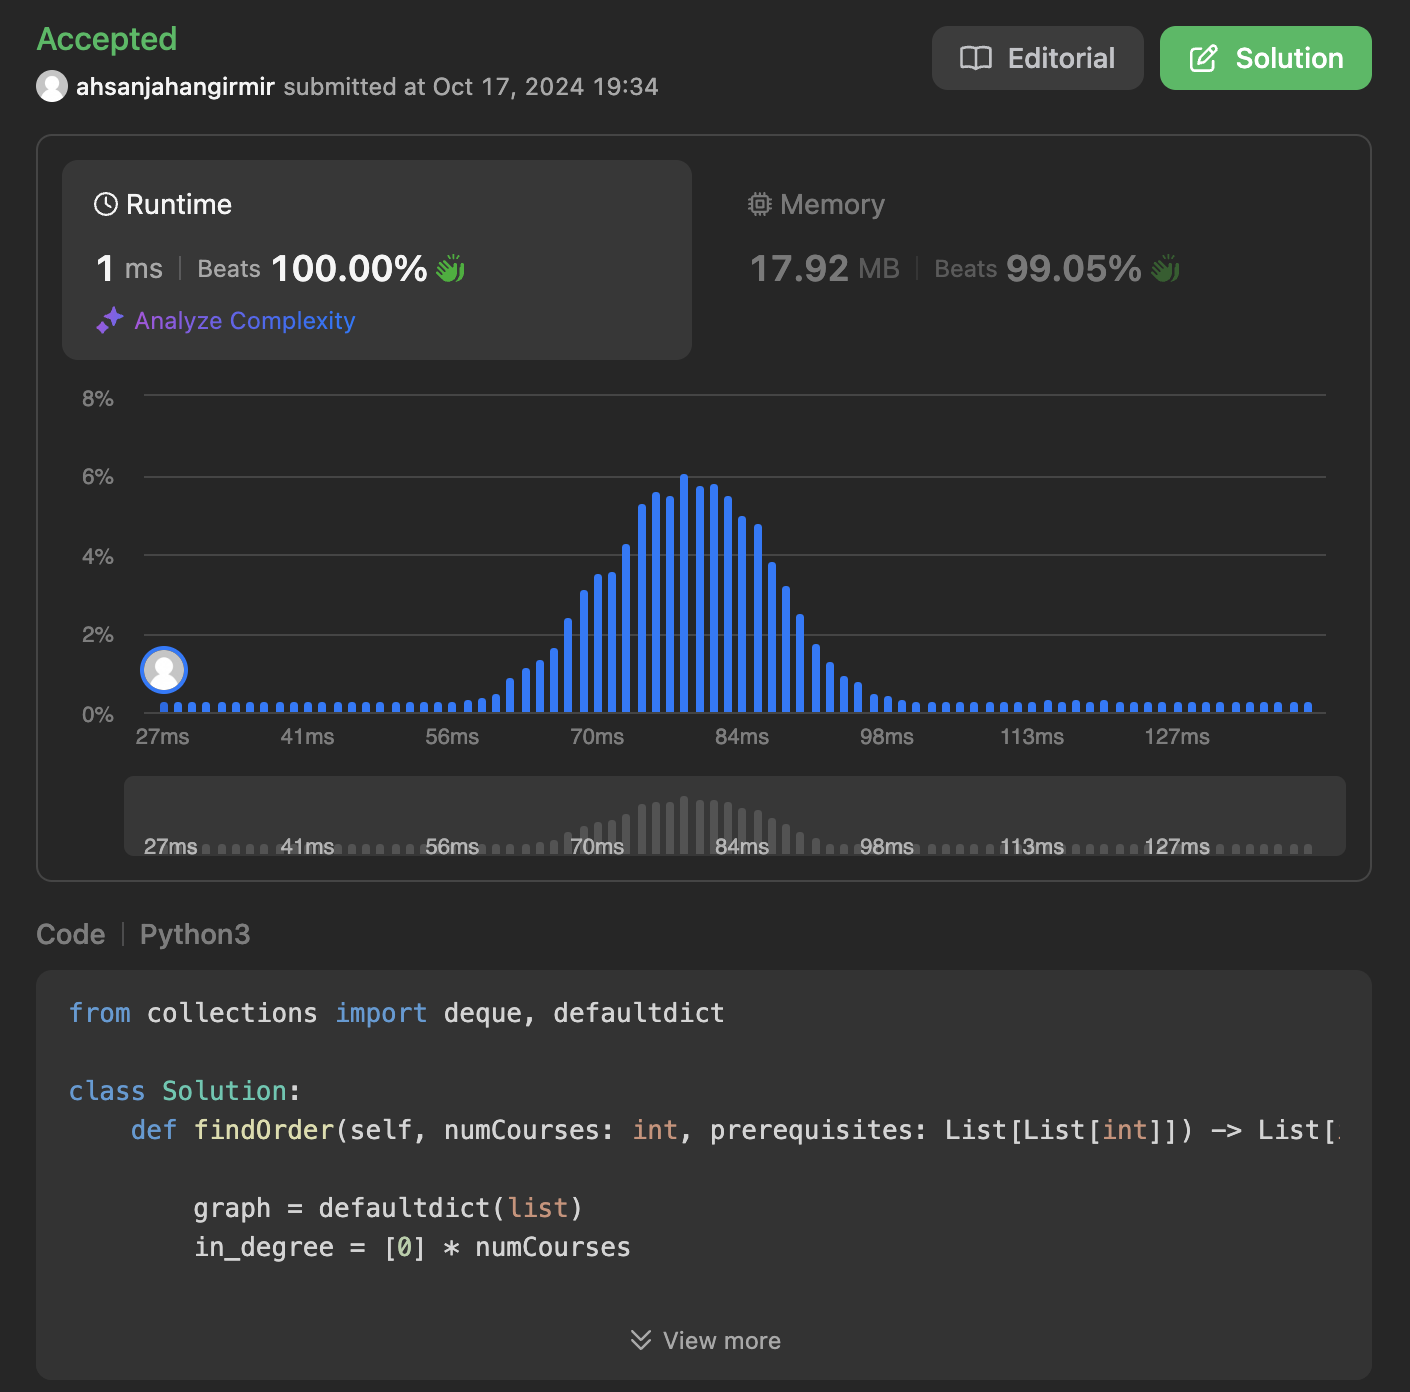
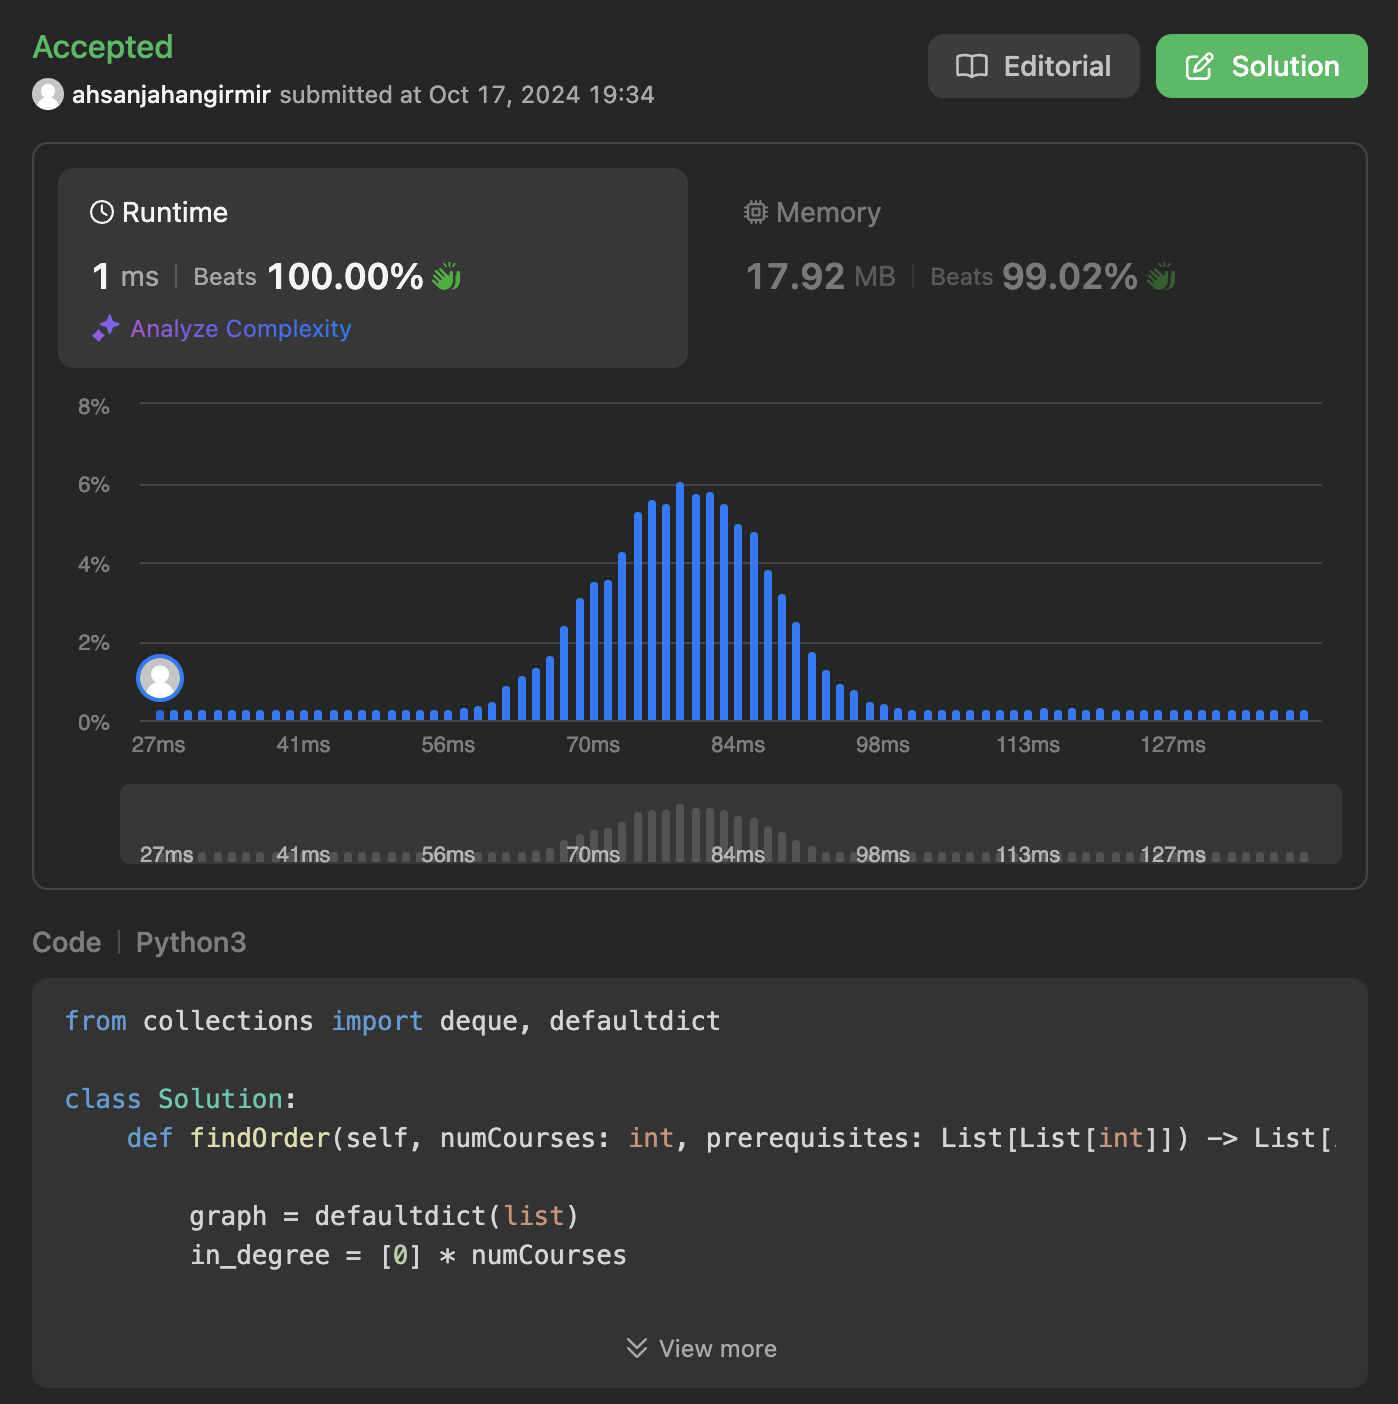

Thought Process / Reflection on challenges faced:

My initial thought was to approach the problem with DFS. However, I soon realized that a topological sorting using breadth-first search (BFS) would be more efficient for detecting cycles and ensuring the correct order of courses. The main challenge was correctly tracking the in-degrees of each course. I had to carefully manage the in-degree array and the queue to ensure that I only added courses with no prerequisites. At first, I overlooked the need to check whether all courses could be completed (by comparing the length of the topological order with numCourses), but once I handled that, the solution became more robust for detecting invalid course orders.

Time Complexity

O(V+E)

Space Complexity

O(V+E)

Time Taken

27 minutes

**Problem 3:**
Minimum Height Trees (20)

In [ ]:
from collections import defaultdict, deque

class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        if n == 1:
            return [0]
        if n == 2:
            return [0, 1]
    
        graph = defaultdict(list)
        for u, v in edges:
            graph[u].append(v)
            graph[v].append(u)
        
        leaves = deque([i for i in range(n) if len(graph[i]) == 1])
        
        remaining_nodes = n
        while remaining_nodes > 2:
            leaves_count = len(leaves)
            remaining_nodes -= leaves_count
            
            for _ in range(leaves_count):
                leaf = leaves.popleft()
                for neighbor in graph[leaf]:
                    graph[neighbor].remove(leaf)
                    if len(graph[neighbor]) == 1:
                        leaves.append(neighbor)
    
        return list(leaves)


Proof of Acceptance / Attempt:

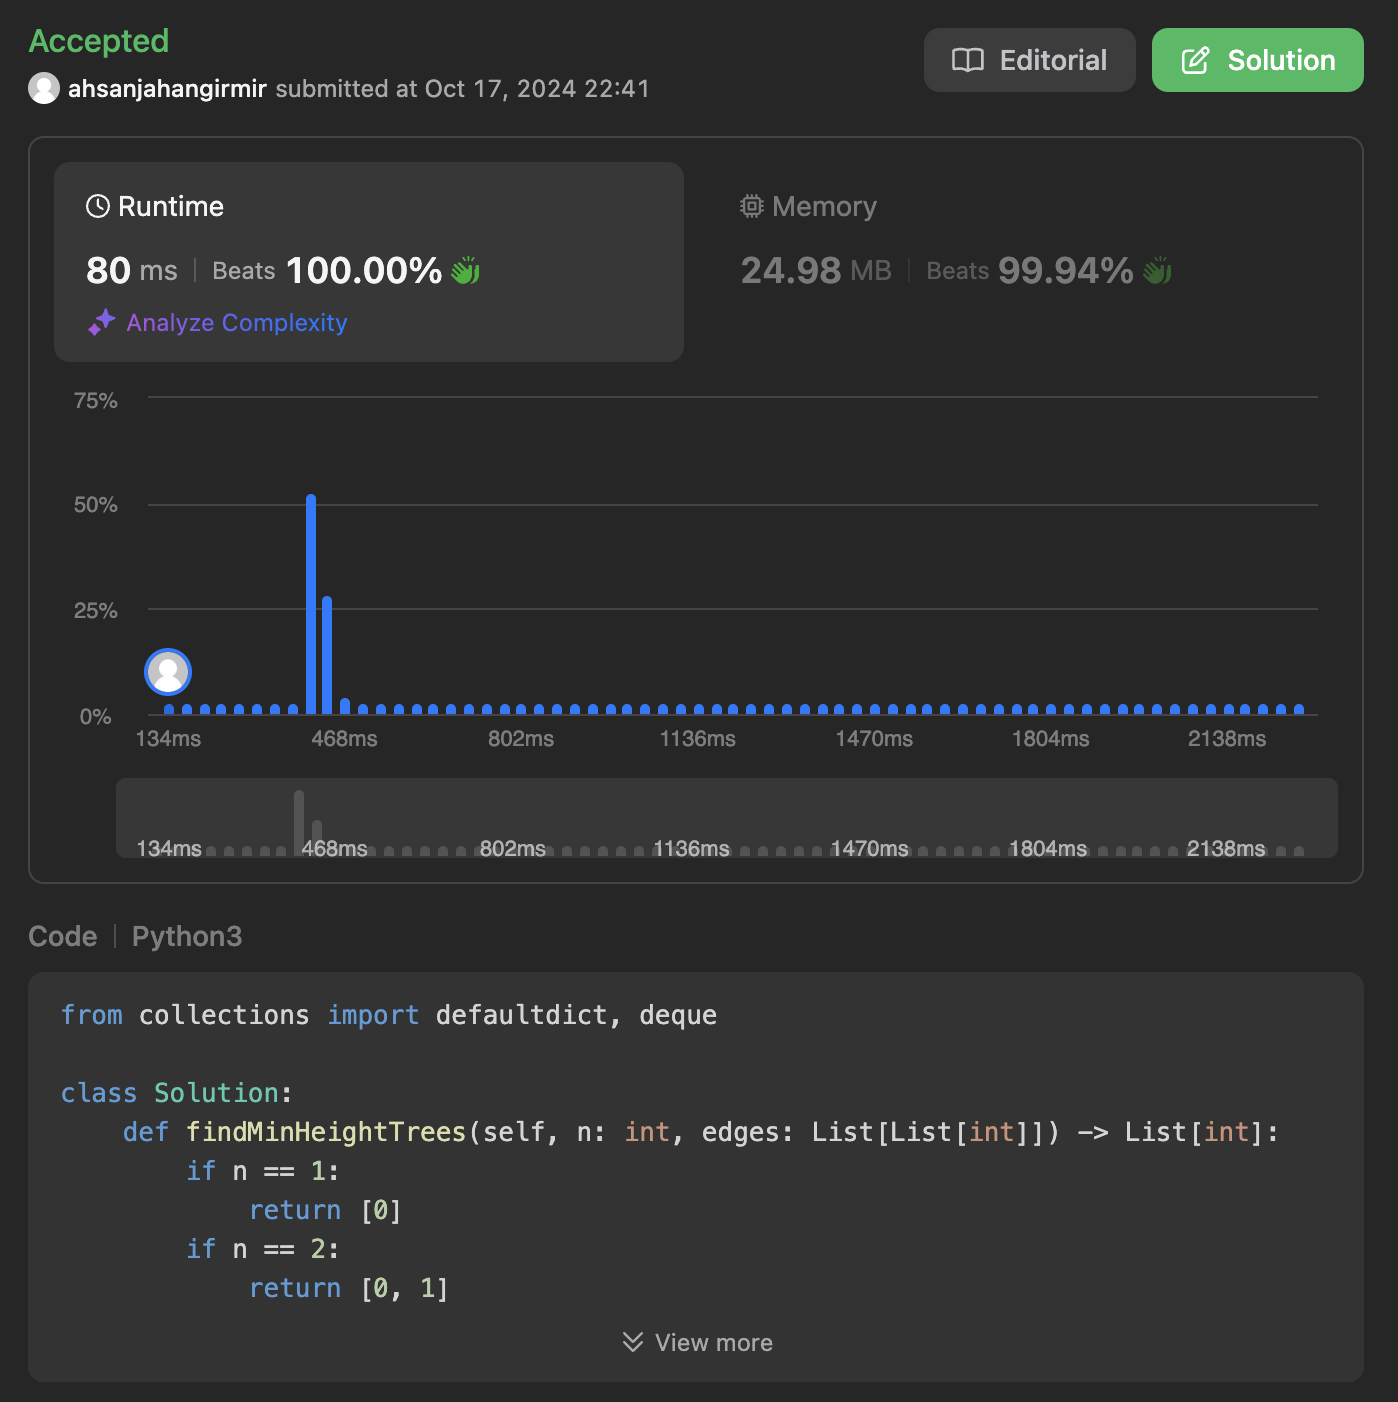
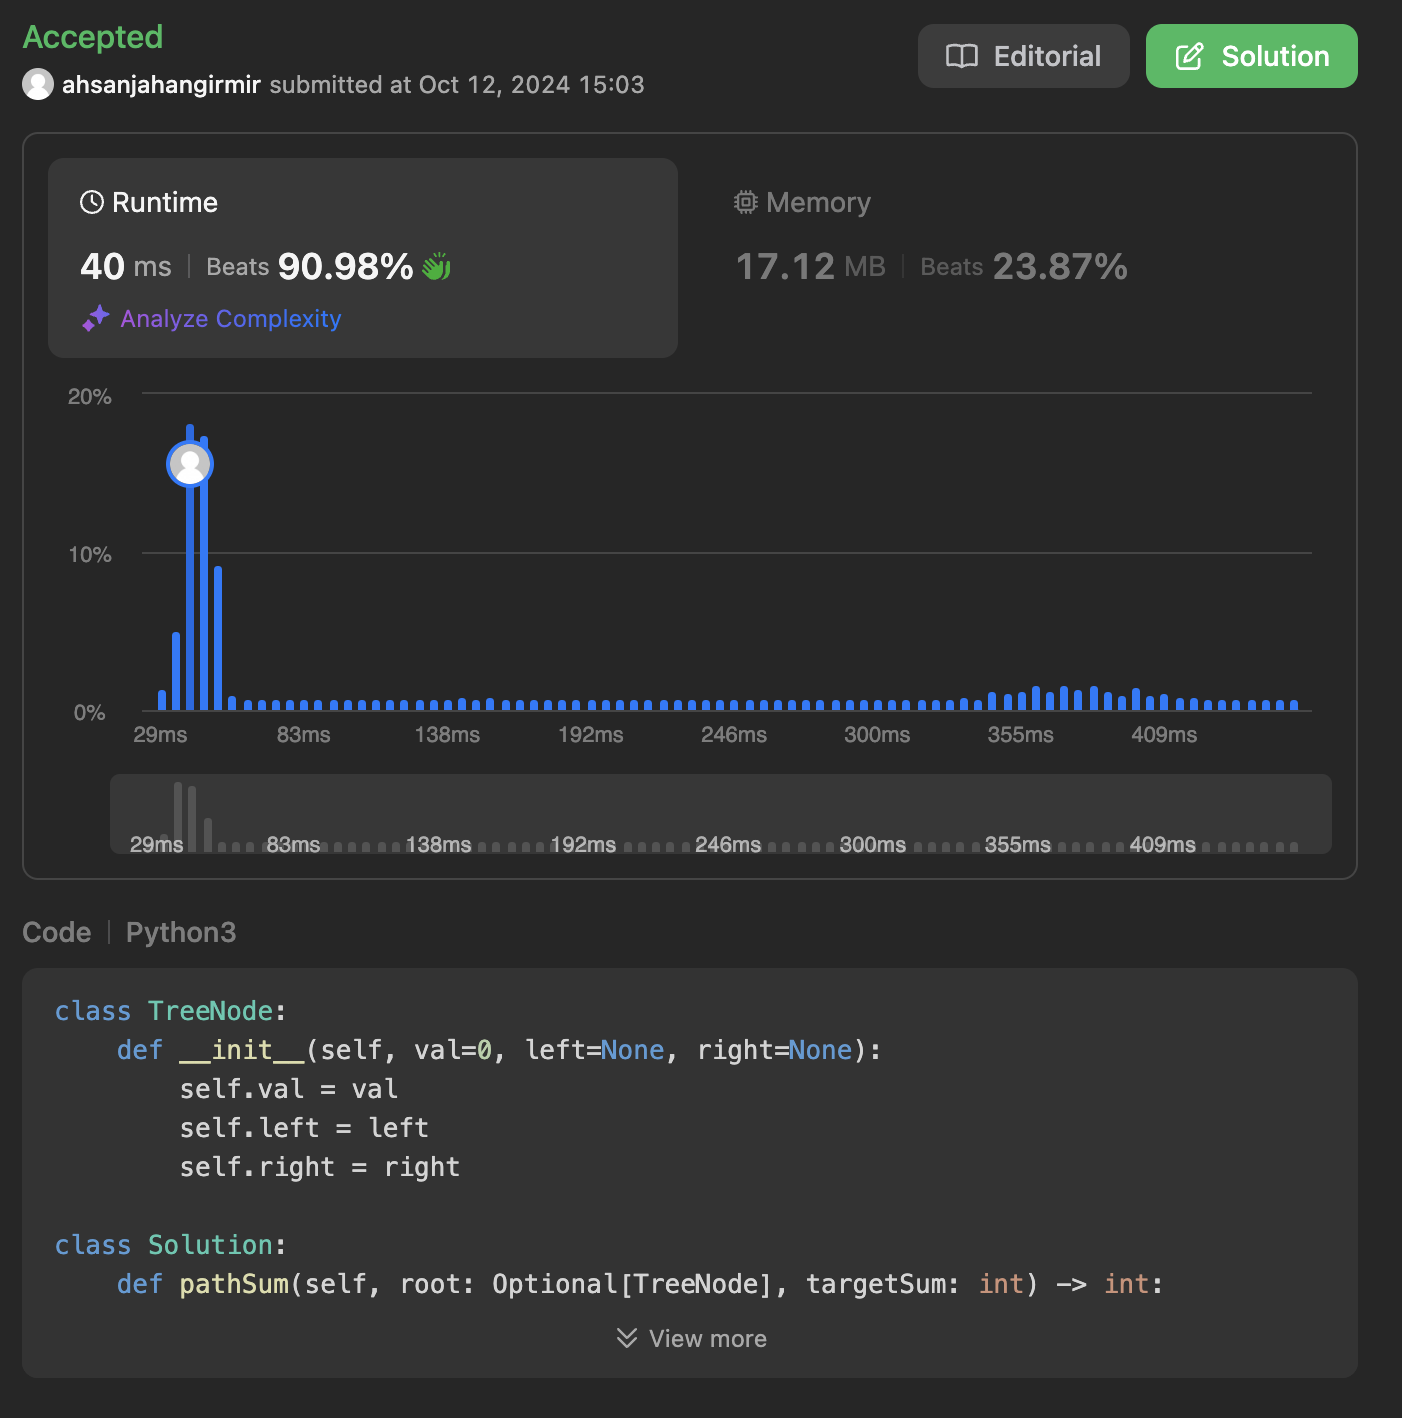
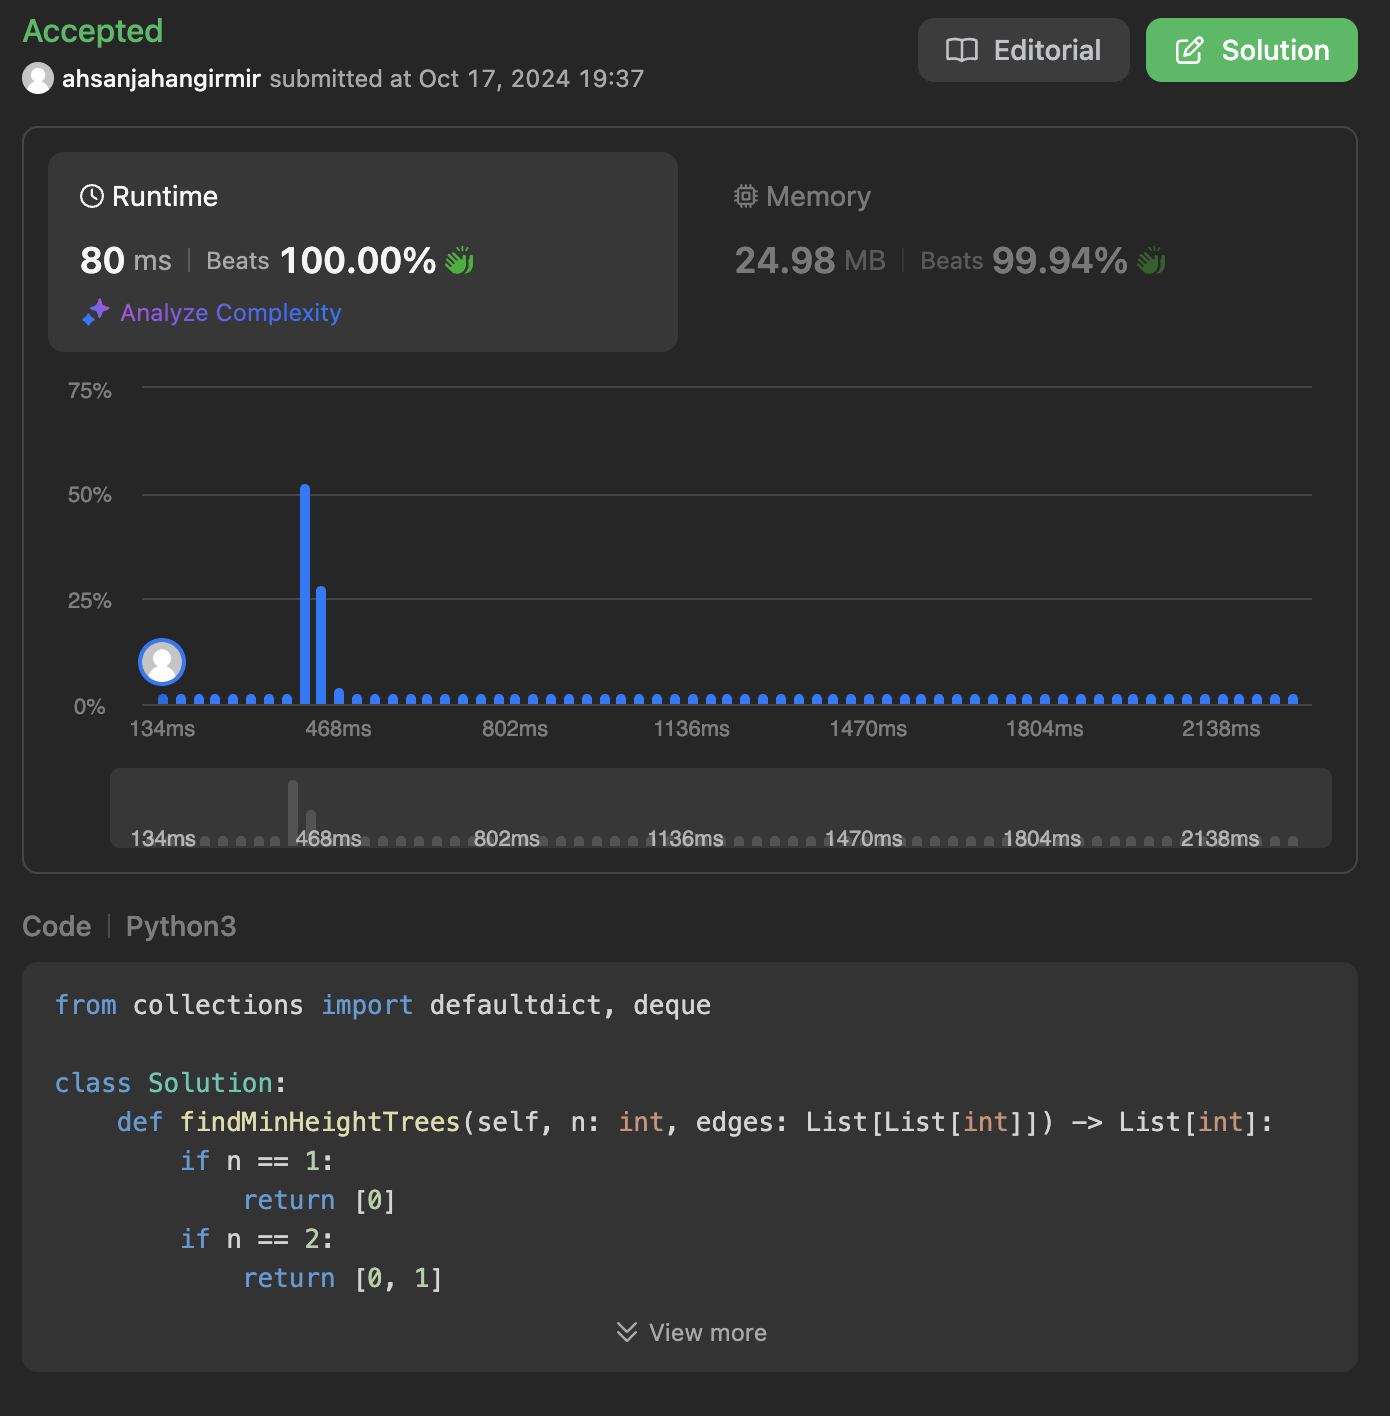
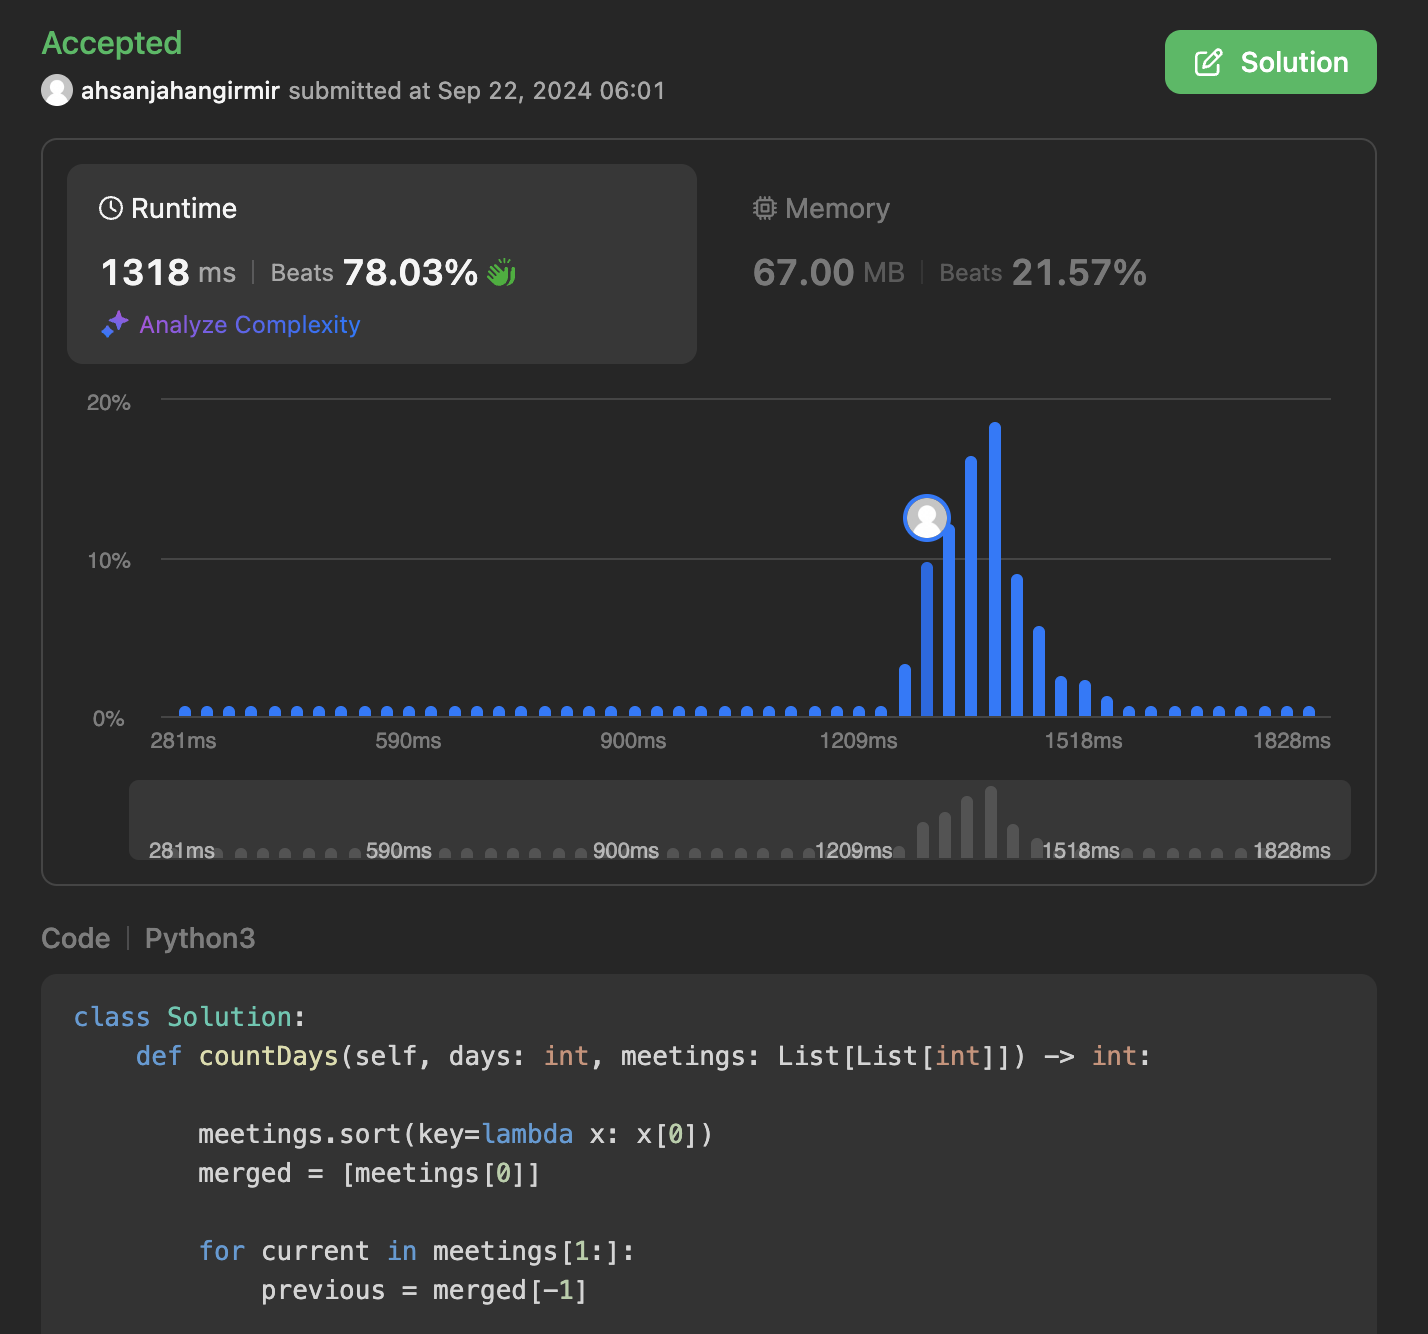

Thought Process / Reflection on challenges faced:

I started by thinking about the nature of tree structures and how the problem resembles "peeling off" the outermost layers of a graph. My initial thought was to use some form of DFS, but I quickly realized that removing leaves level by level until reaching the core was a more efficient solution. One challenge I faced was ensuring that the graph was updated correctly as I removed leaves. Using a deque to store the current leaves and removing nodes with only one connection I was able to efficiently reduce the problem size. finally, I had to be mindful of the edge condition when the remaining nodes were less than or equal to 2, as those form the roots of the minimum height trees.

Time Complexity

O(V+E)

Space Complexity

O(V+E)

Time Taken

23 minutes

**Problem 4:**
Number of operations to make network connected (20)

In [ ]:
class Solution:
    def makeConnected(self, n: int, connections: List[List[int]]) -> int:

        if len(connections) < n - 1:
            return -1
    
        parent = list(range(n))  # initially set each node as its own parent
        rank = [0] * n           

        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]

        def union(x, y):
            rootX = find(x)
            rootY = find(y)
            if rootX != rootY:
                if rank[rootX] > rank[rootY]:
                    parent[rootY] = rootX
                elif rank[rootX] < rank[rootY]:
                    parent[rootX] = rootY
                else:
                    parent[rootY] = rootX
                    rank[rootX] += 1

        for u, v in connections:
            union(u, v)
        
        components = len(set(find(i) for i in range(n)))

        return components - 1

Proof of Acceptance / Attempt:

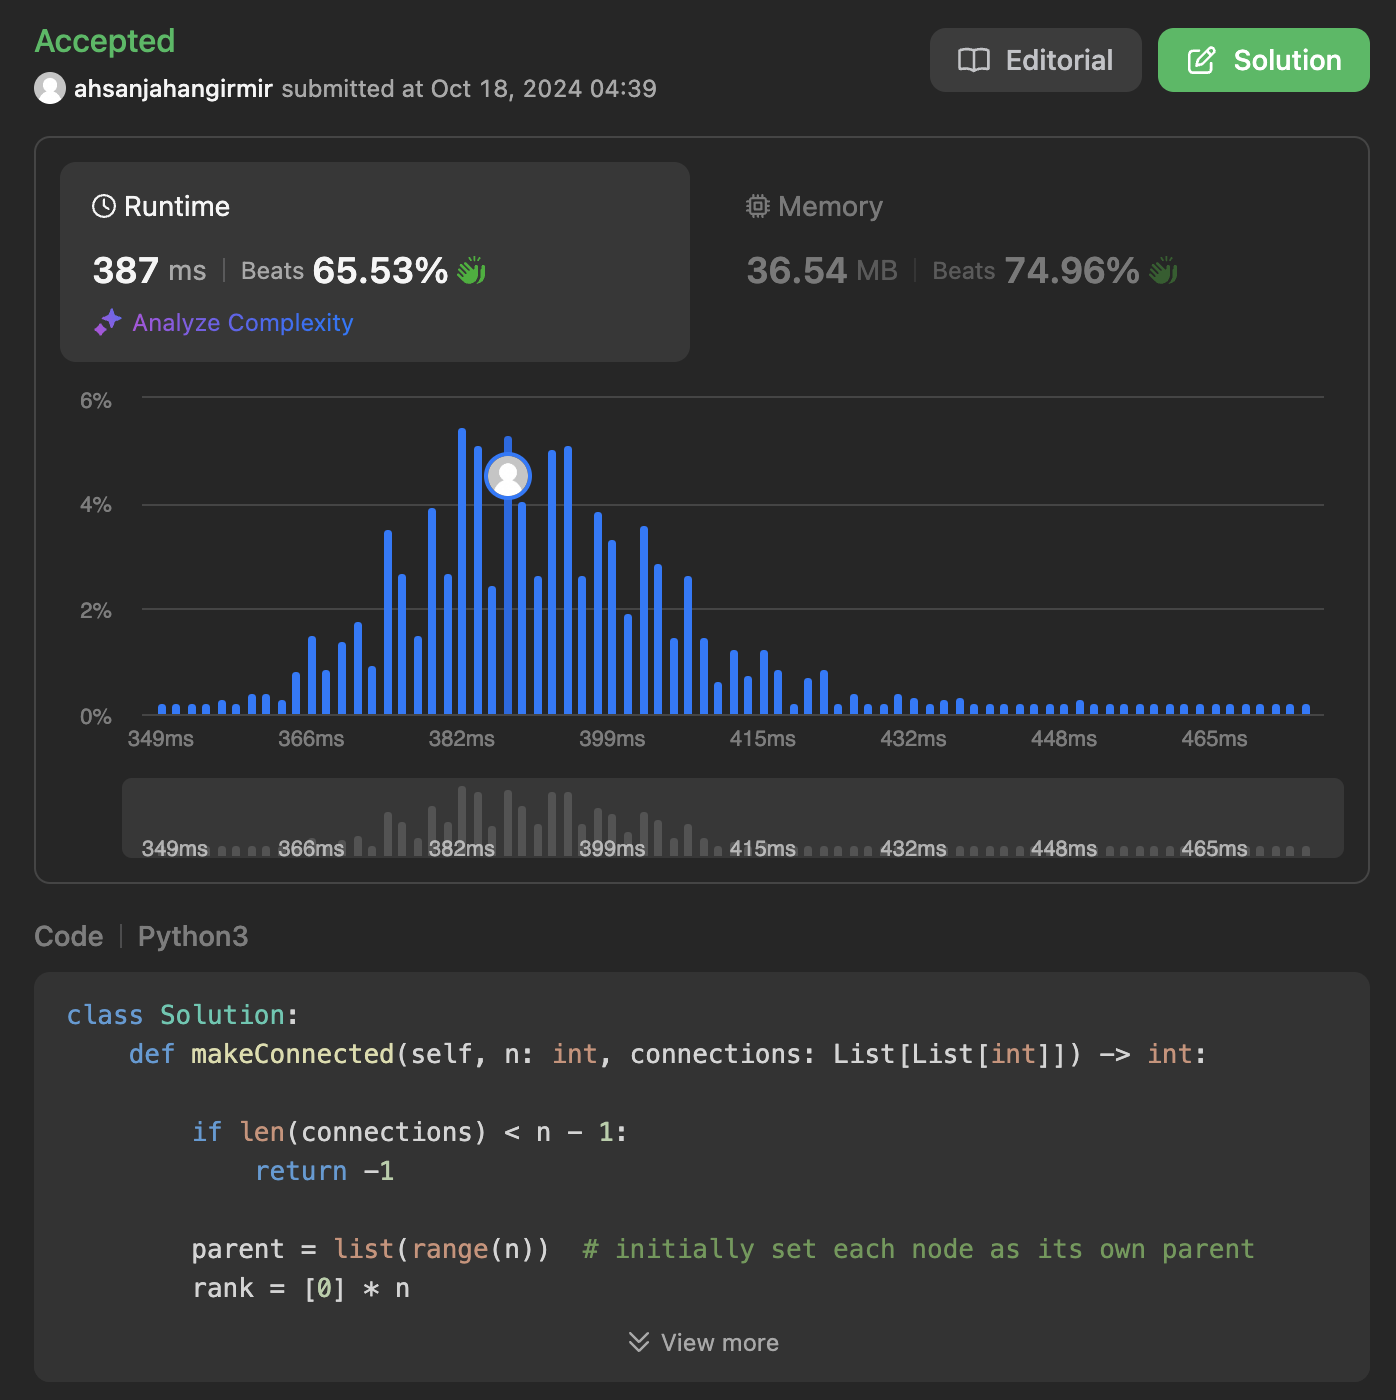
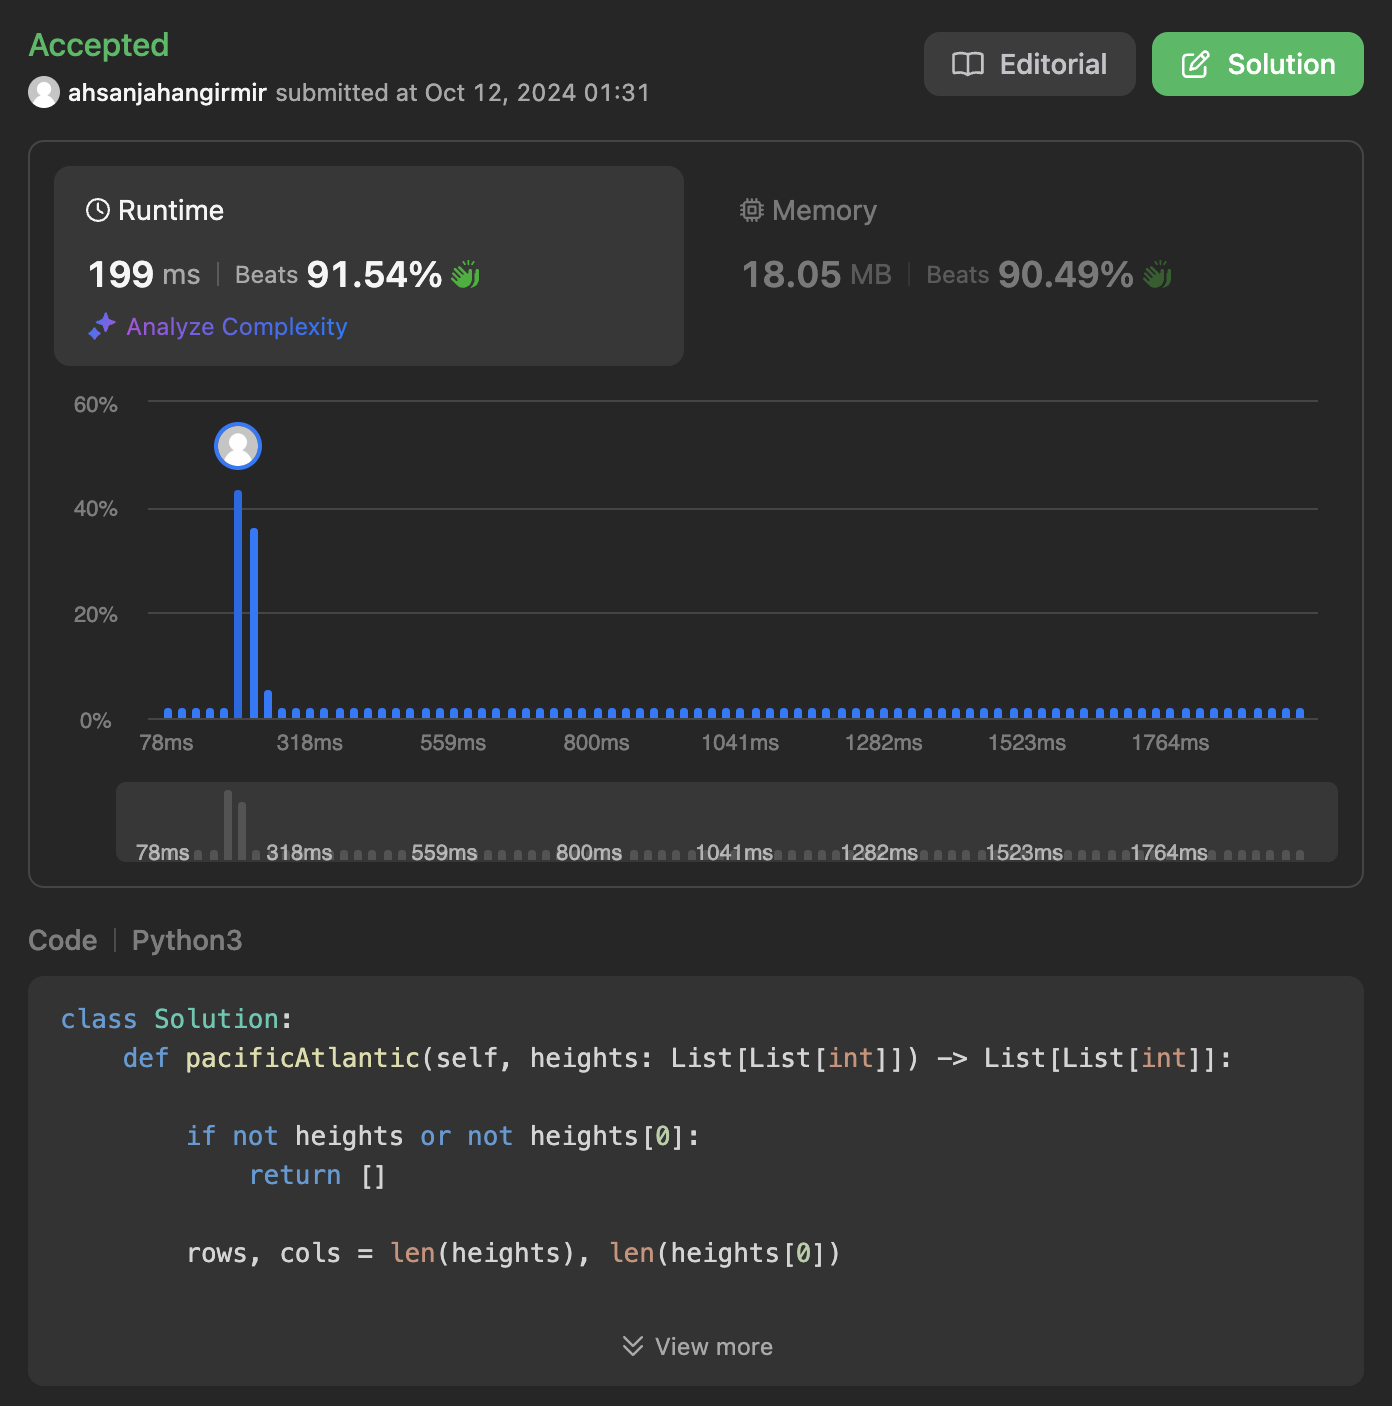
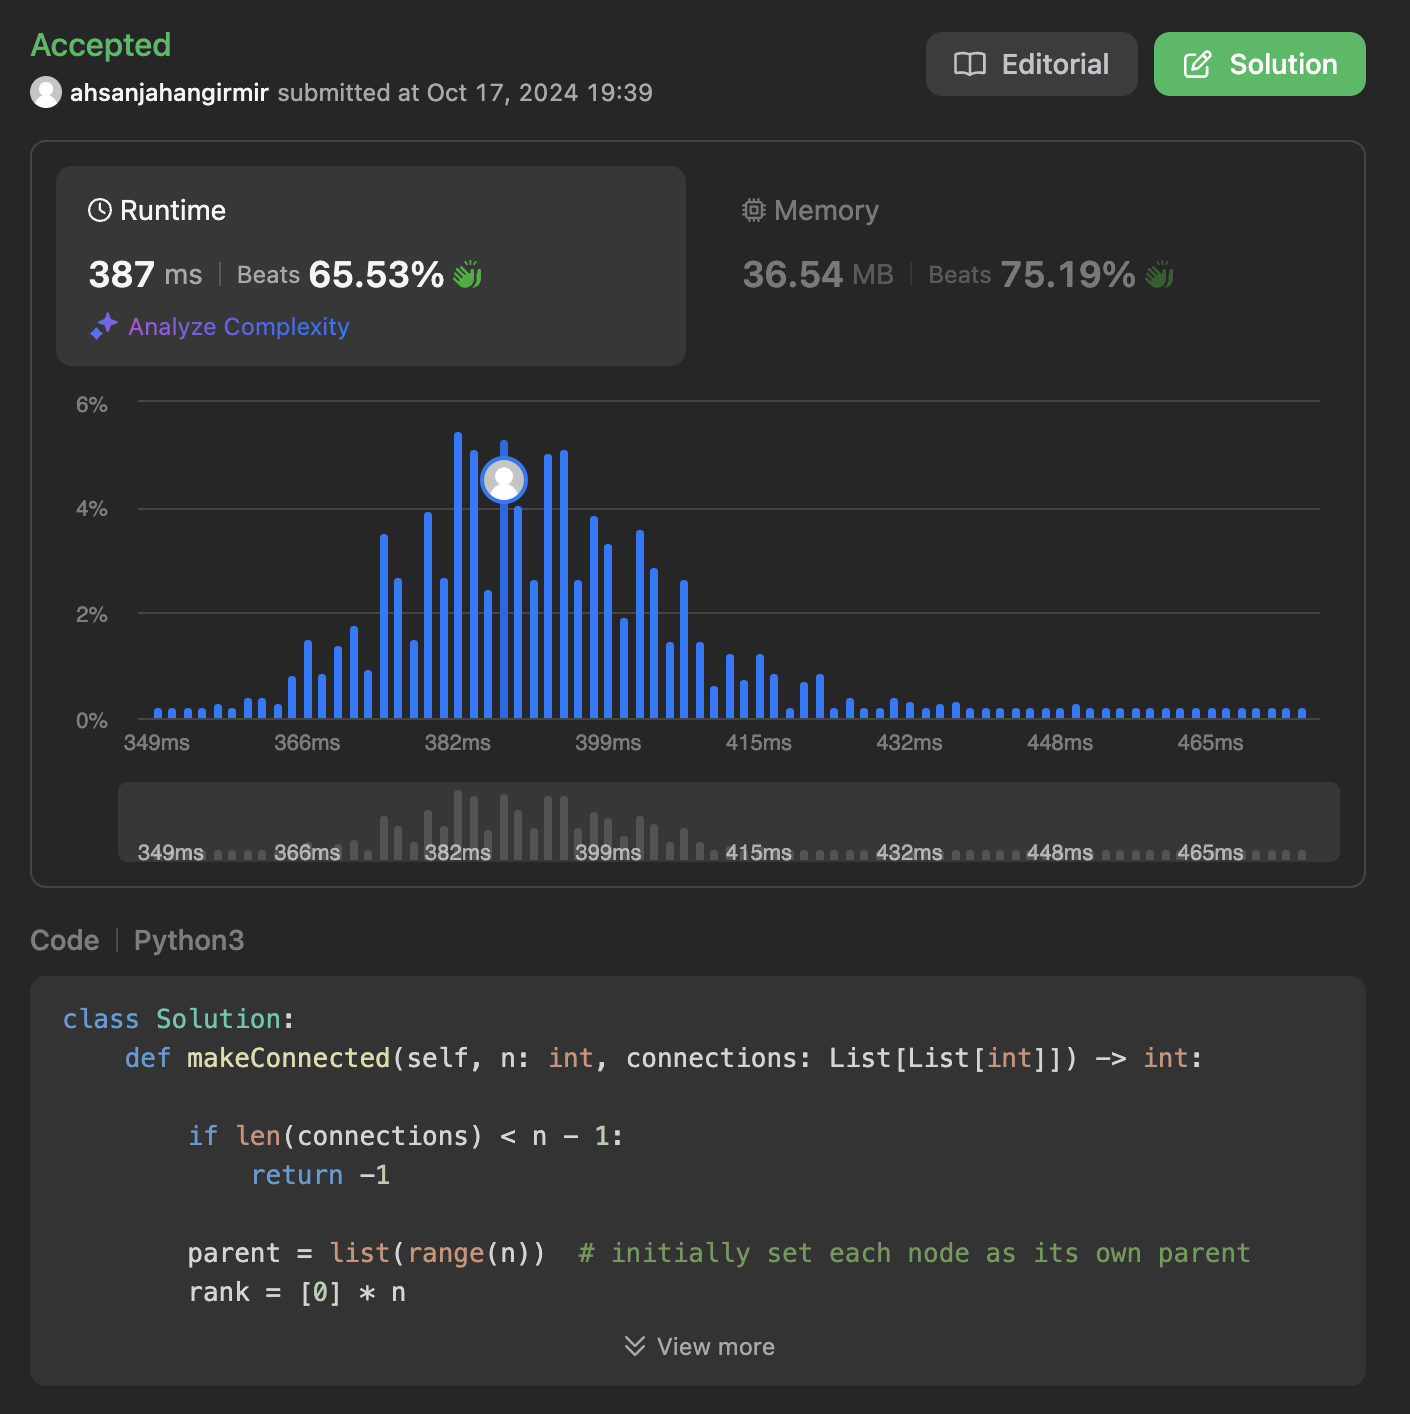
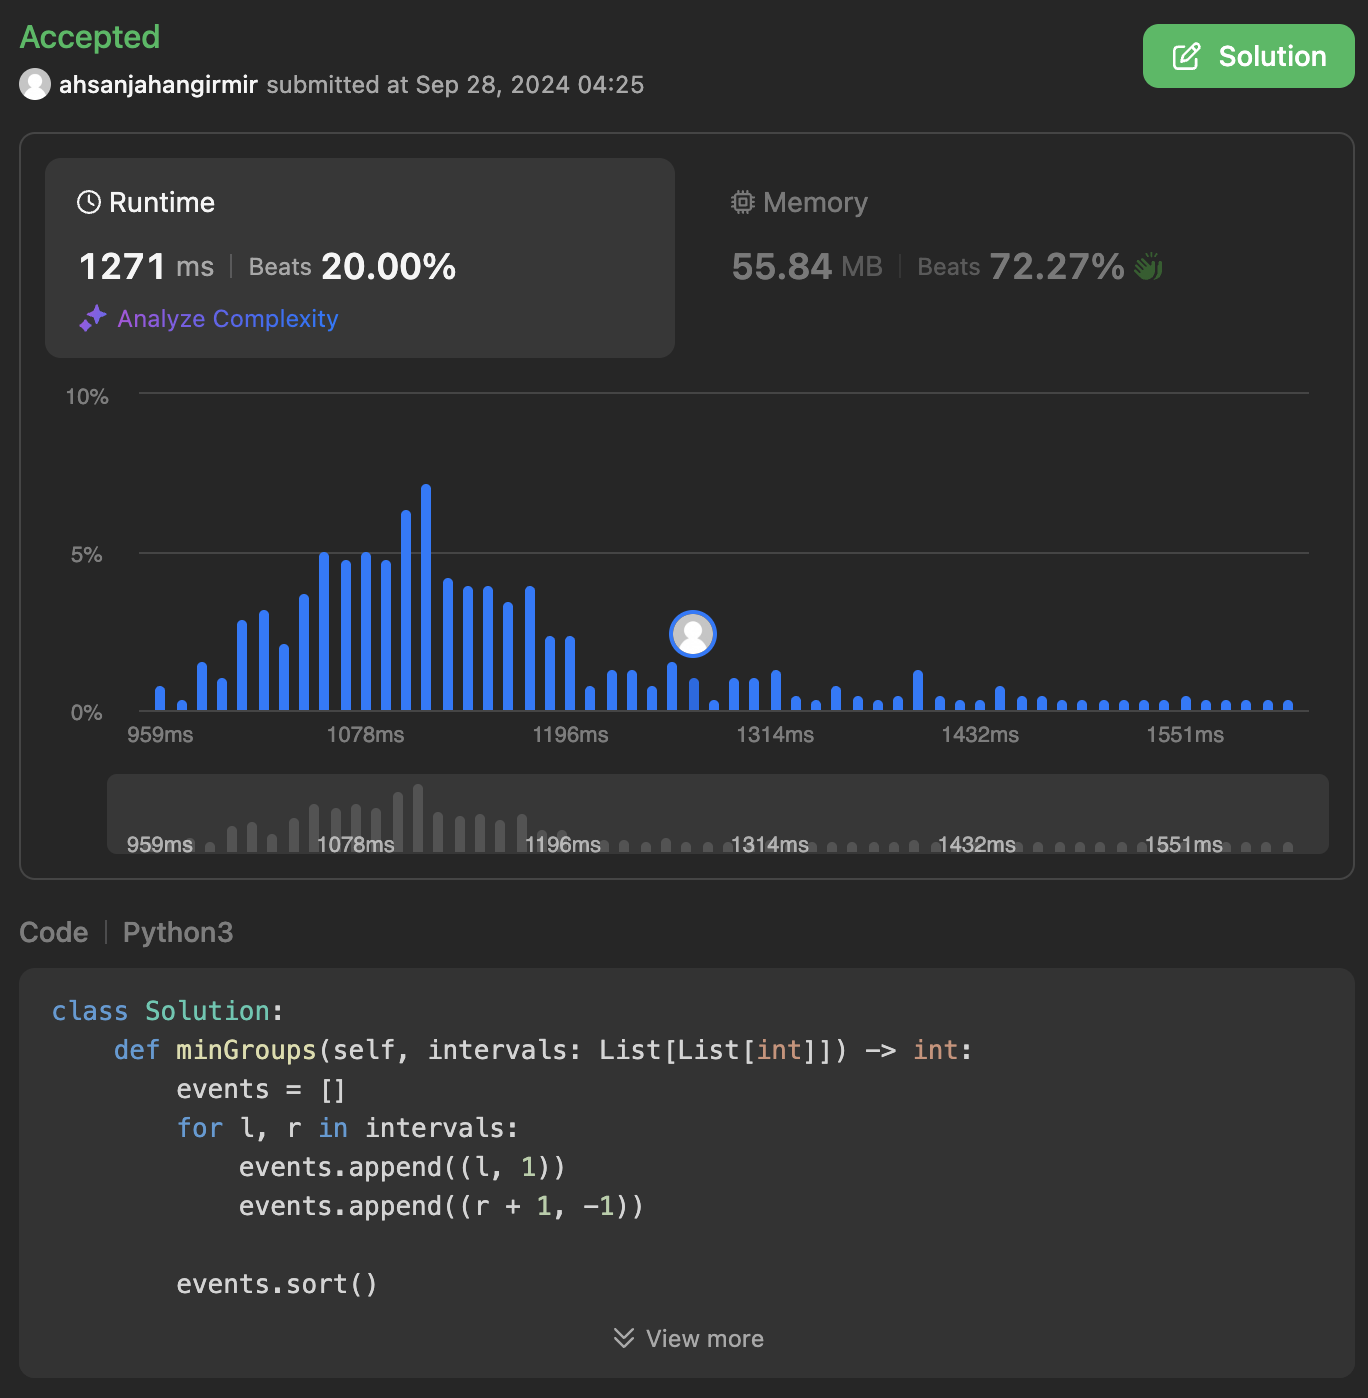

Thought Process / Reflection on challenges faced:

this problem involved finding the number of connected components in a graph, which naturally led me to a union-find solution which made it more efficient to manage the merging of components. The key challenge was figuring out if there were enough connections to connect all the nodes. If the number of connections was less than n - 1, it was impossible to connect all computers, so I handled that edge case upfront. The union-find structure allowed me to easily combine nodes while keeping track of connected components. Finally, I calculated the number of components and returned the additional steps needed to connect them.

Time Complexity

O(E * V)

Space Complexity

O(V)

Time Taken

28 minutes

**Problem 5:**
 Detonate the maximum bombs (20)


In [ ]:
from math import sqrt

class Solution:
    def maximumDetonation(self, bombs: List[List[int]]) -> int:
        
        def can_detonate(i, j):
            x1, y1, r1 = bombs[i]
            x2, y2, _ = bombs[j]
            return (x2 - x1) ** 2 + (y2 - y1) ** 2 <= r1 ** 2
        
        n = len(bombs)
        graph = [[] for _ in range(n)]
        
        for i in range(n):
            for j in range(n):
                if i != j and can_detonate(i, j):
                    graph[i].append(j)
        
        def dfs(start, visited):
            stack = [start]
            visited.add(start)
            count = 1
            
            while stack:
                node = stack.pop()
                for neighbor in graph[node]:
                    if neighbor not in visited:
                        visited.add(neighbor)
                        stack.append(neighbor)
                        count += 1
            return count
        
        max_bombs = 0
        
        for i in range(n):
            visited = set()
            max_bombs = max(max_bombs, dfs(i, visited))
        
        return max_bombs


Proof of Acceptance / Attempt:

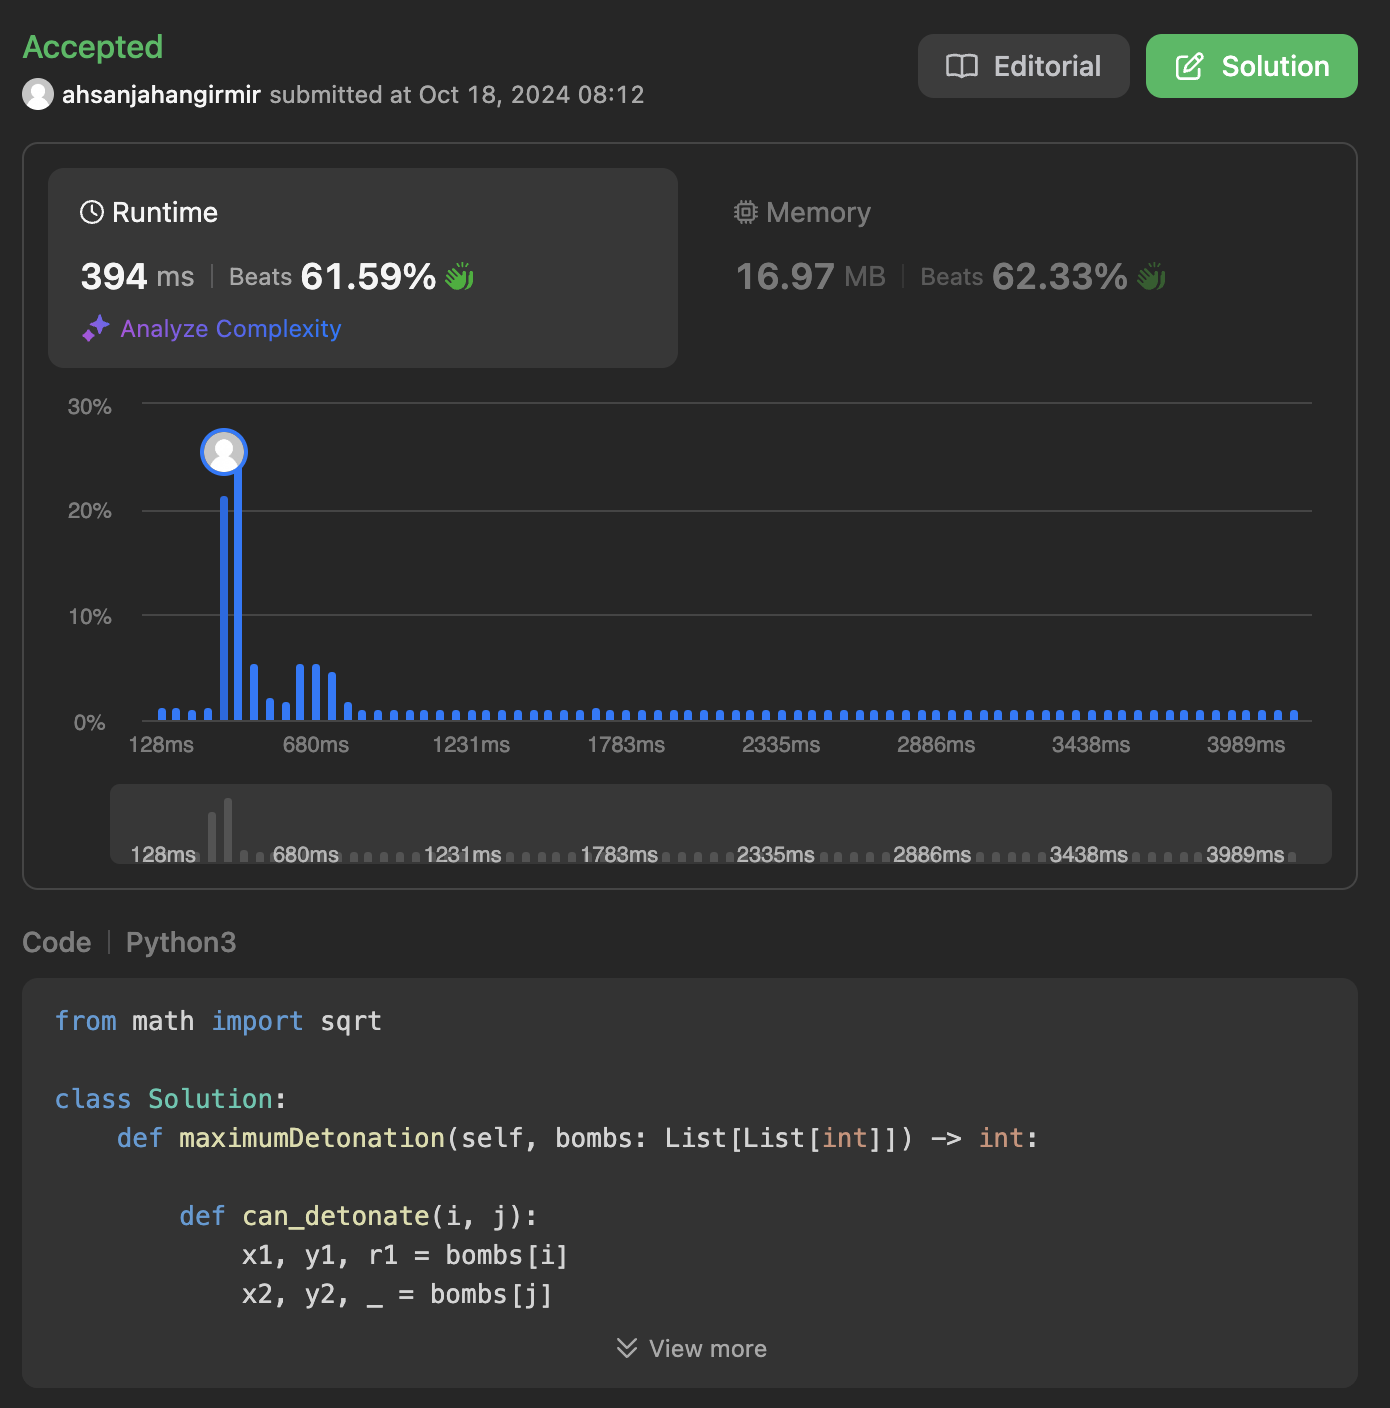
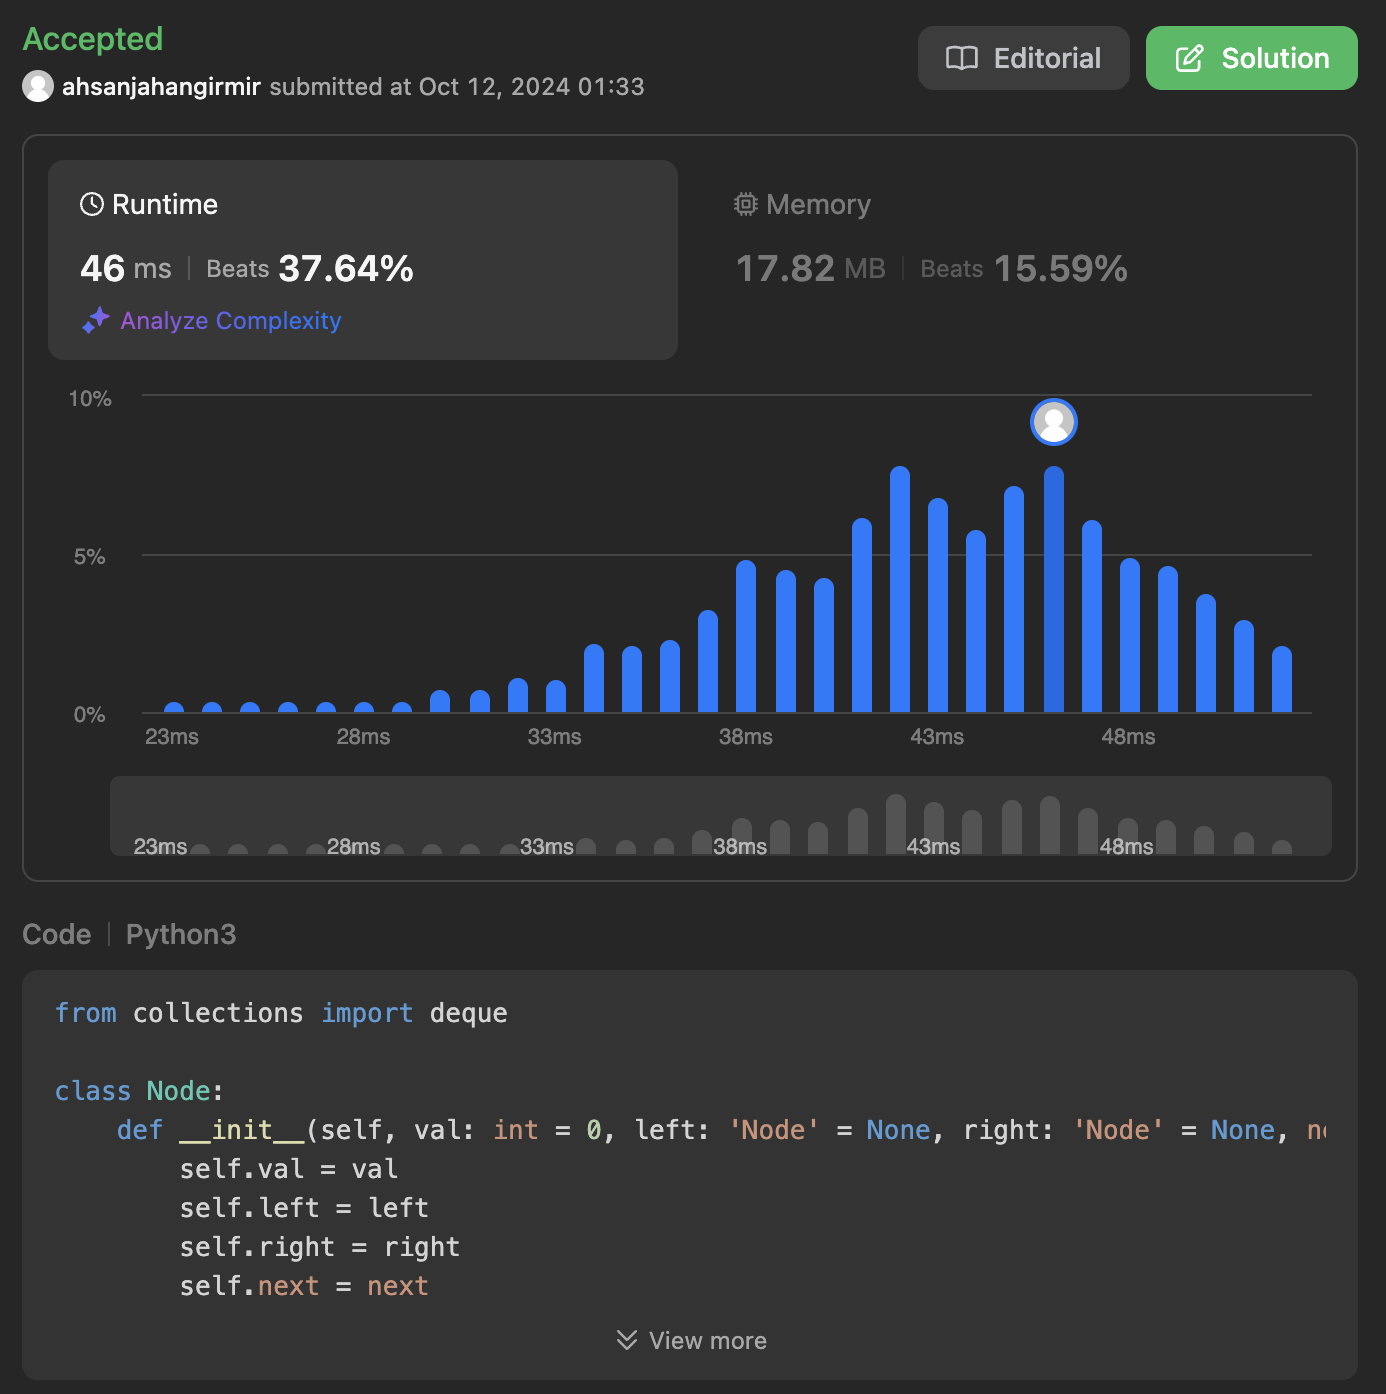
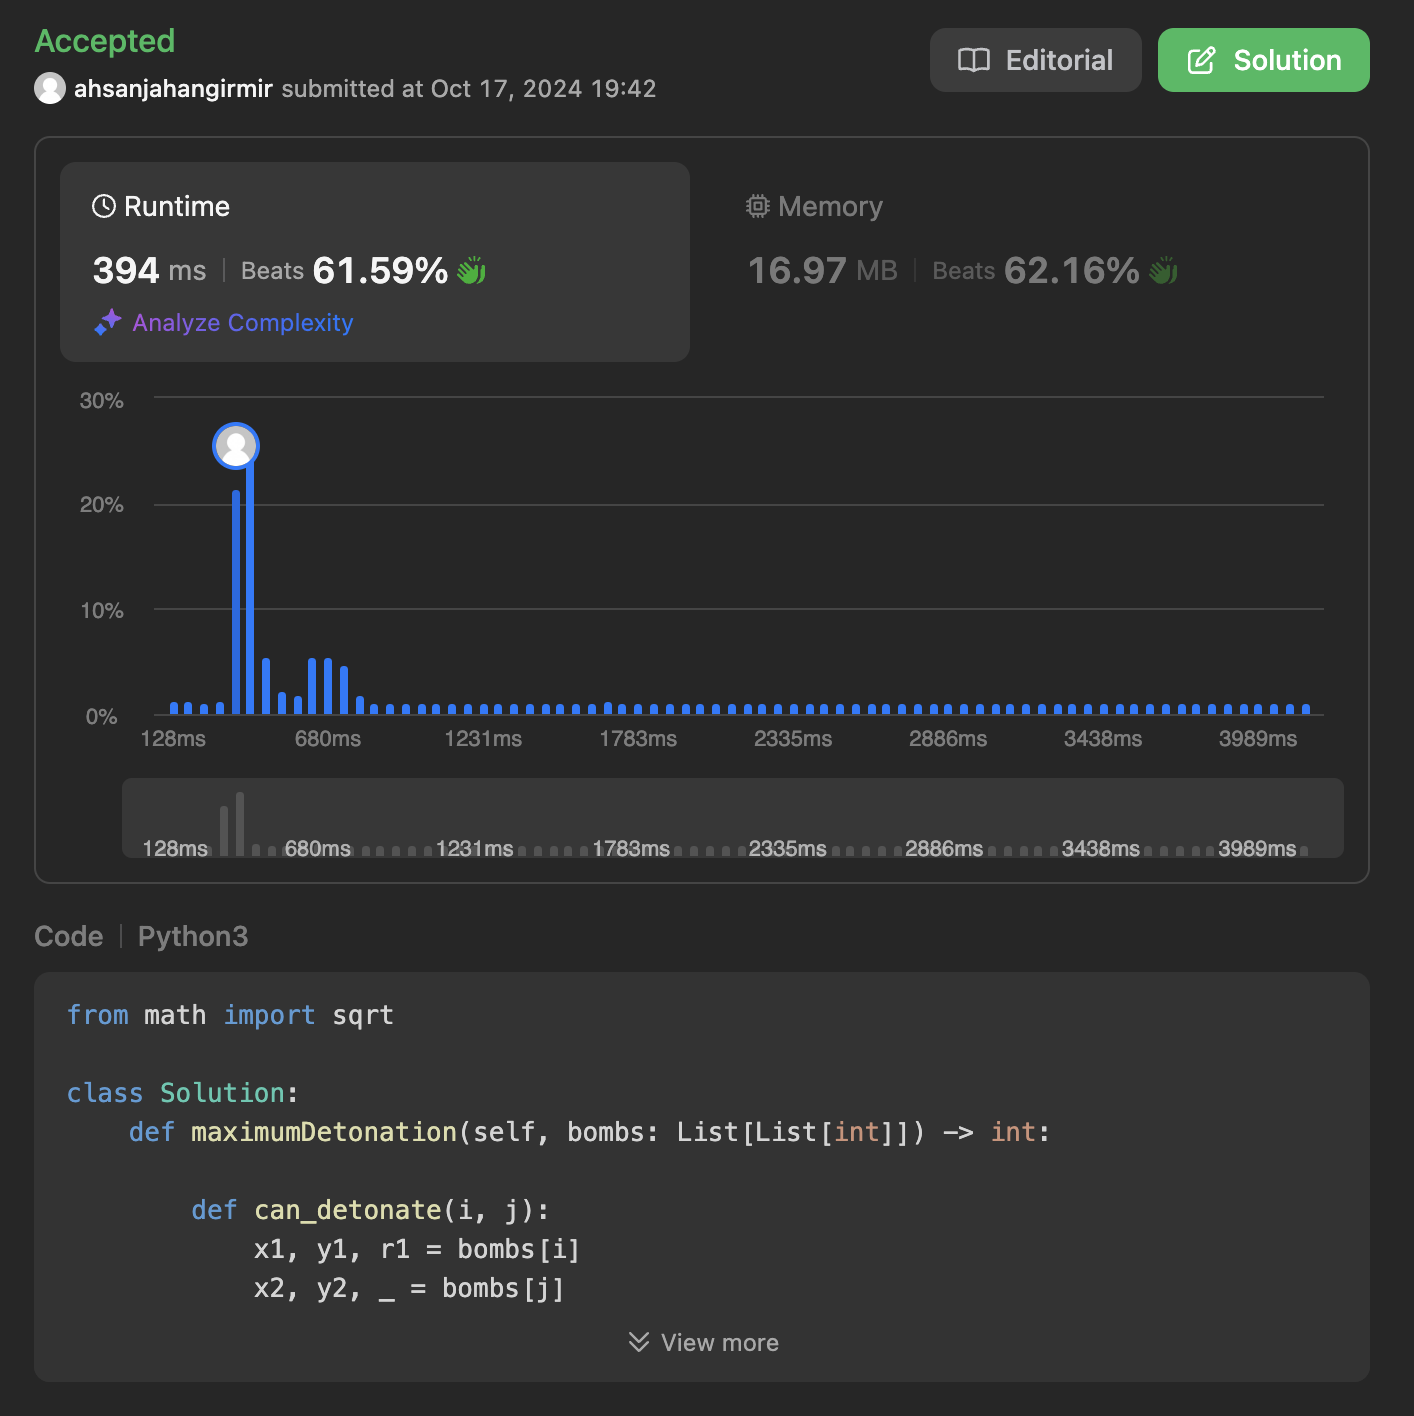
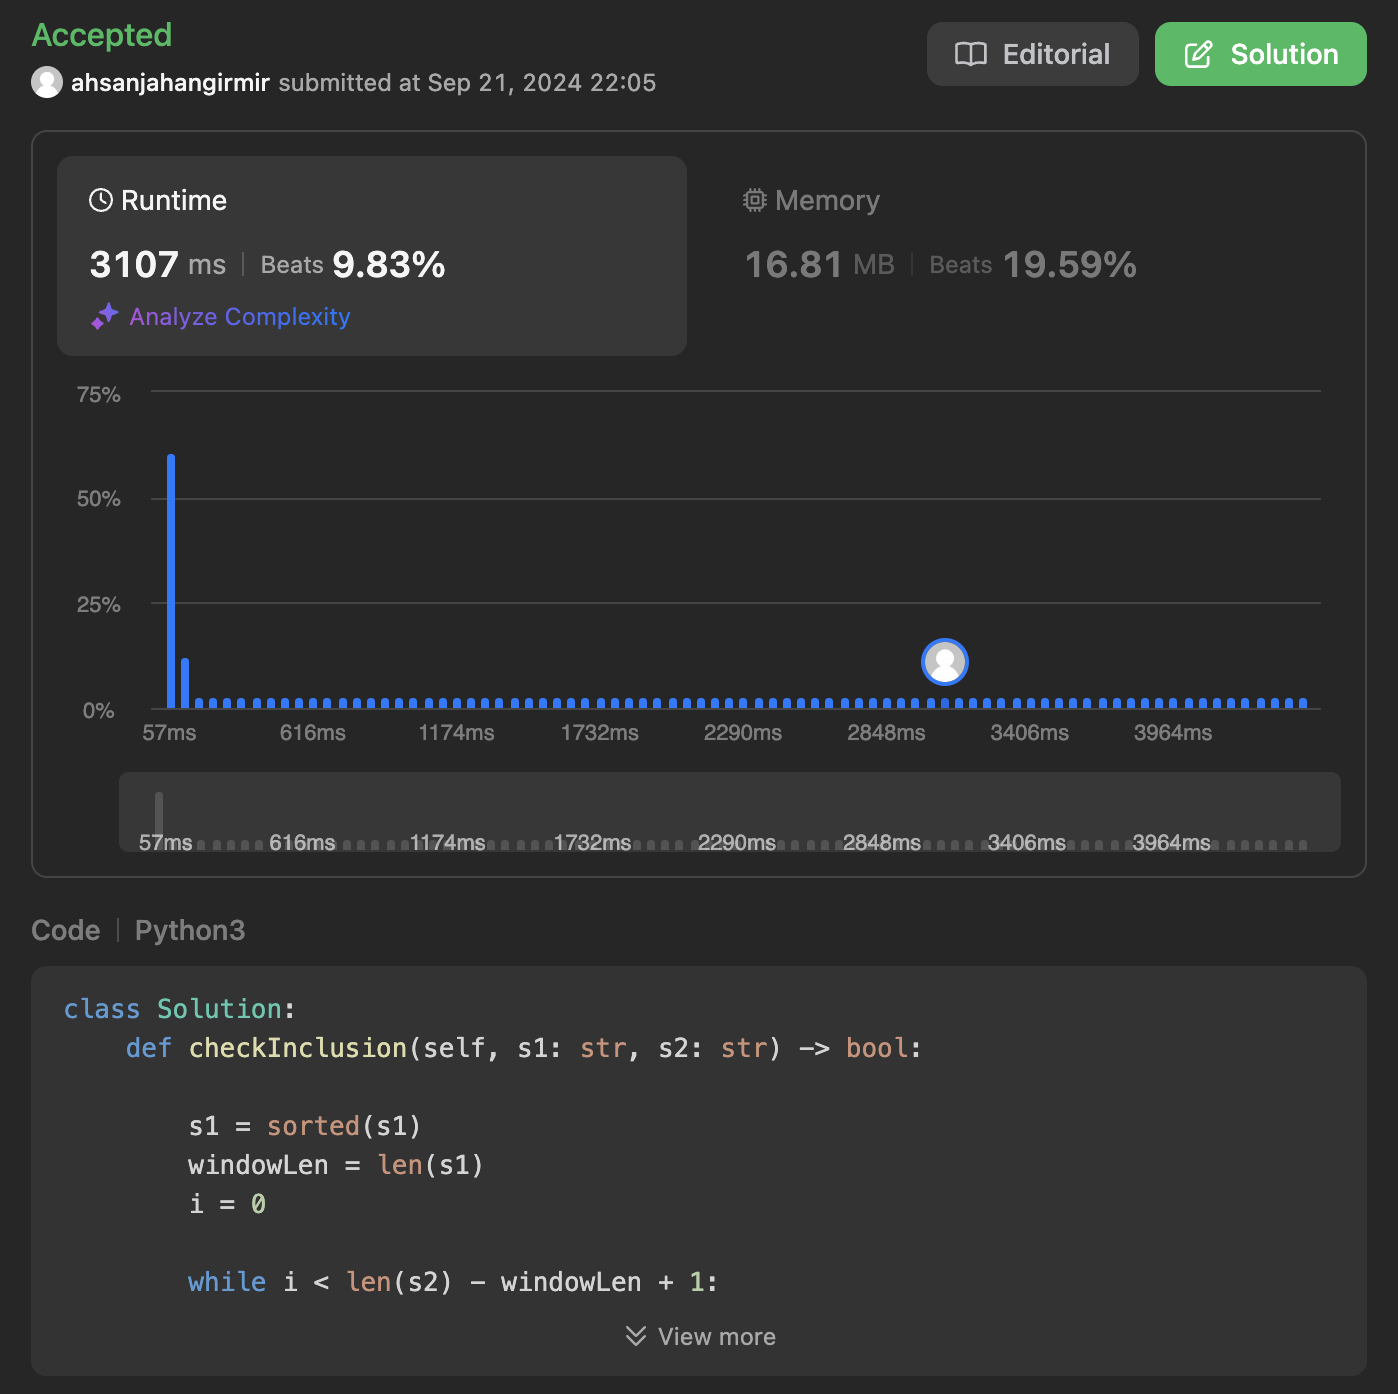

Thought Process / Reflection on challenges faced:

This problem was similar to the previous one in the sense we were finding connected components in a graph, where each bomb represents a node, and an edge exists if one bomb can trigger another. I began to model this as a directed graph by checking if one bomb can detonate another using the distance formula. The challenge was ensuring that I efficiently explored all potential bomb detonations. I implemented depth-first search (DFS) from each bomb to determine how many bombs could be detonated starting from it. At first, I wasn't sure if DFS or BFS would be more efficient, but DFS worked well for managing the recursive traversal. Finally, I tracked the maximum number of bombs that could be detonated from any starting bomb.

Time Complexity

O(N^2 + N * E)

Space Complexity

O(N + E)

Time Taken

36 minutes